In [146]:
import dash
import dash_core_components as dcc
from dash import html
from dash.dependencies import Input, Output

# we want dif colors per each graph

app_custom = dash.Dash(__name__,title = 'Custom Color Dashboard')

app_custom.layout = html.Div(children=[
    html.H1(children='Business Analysis'),
    
    #html.Div(children='''
     #   A dashboard to display information from sales.
    #'''),
    
    dcc.Graph(
        id='custom-graph'
    ),
    
    dcc.Dropdown(
    id='custom-dropdown',
    options = [{'label':i, 'value':i} for i in df_test.columns.unique()],
    value = df_test.columns[0]
    )
])

@app_custom.callback(
    Output('custom-graph','figure'),
    [Input('custom-dropdown','value')]
)

def update_figure(selected_column):
    custom_colors = ['orange','blue','green','red','salmon','lightblue','darkgreen','darkblue']
   
   # get the index of the selected column
    selected_column_index = df_test.columns.get_loc(selected_column)
    
    # use the index to get the corresponding color from the custom_colors list
    selected_color = custom_colors[selected_column_index % len(custom_colors)]
    
    fig = px.histogram(df_test,x=selected_column, color_discrete_sequence=[selected_color])

    fig.update_layout(transition_duration = 500)

    return fig


if __name__ == '__main__':
    app_custom.run_server(debug=True, port = 8051)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.graph_objs as go

# Exploratory Data Analysis

1. Data Cleaning and Imputation
2. Sales Amount Analysis
3. Geographic Analysis
4. Customer Engagement Analysis

    - Annual Spend and Platform Usage Metrics
    - Platform Metrics Overview
    - Product and Customer Characteristics
    - Data Quality Checks
    - Correlation Analysis

## 1. Data Cleaning and Imputation

In [2]:
df = pd.read_csv('wellness_business_dataset.csv')
df

Sales_Amount  Customer_Age  Transaction_Count Product_Category Region  \
0       109.934283            26                  7                B   East   
1        97.234714            62                  3                B  North   
2       112.953771            26                  6                B   East   
3       130.460597            43                  2                C  North   
4        95.316933            21                  4                A   East   
...            ...           ...                ...              ...    ...   
1995    121.403005            59                  4                D  North   
1996     99.469575            23                  4                D  North   
1997     82.362507            36                  2                C  North   
1998           NaN            20                  3                D   West   
1999     85.101947            35                  4                B   East   

     Repeat_Customer Income_Level  Customer_Lifetime_Value  Annual_Spend  \
0                Yes          Low             12483.570770   2331.979201   
1                Yes       Medium              9308.678494    797.044299   
2                 No       Medium             13238.442690   2069.692403   
3                 No       Medium             17615.149280    999.491445   
4                 No          Low              8829.233126   4137.058445   
...              ...          ...                      ...           ...   
1995              No         High             15350.751190   1774.779816   
1996              No       Medium              9867.393704   2301.407763   
1997              No          Low              5590.626744   4153.397558   
1998             Yes          Low              9184.665180    562.379612   
1999             Yes         High              6275.486776   3422.204691   

      Average_Discount_Utilized  Session_Duration_Minutes  \
0                     21.721913                 28.158542   
1                     24.966395                 18.698213   
2                     28.318823                 32.730107   
3                      5.503446                  9.253600   
4                      8.844593                 29.080432   
...                         ...                       ...   
1995                  11.714973                 36.604600   
1996                  17.370649                 26.145068   
1997                   7.152903                  9.286228   
1998                  18.978416                 41.677419   
1999                  17.569586                 22.249550   

      Page_Views_per_Session  Ad_Clicks_per_Session  \
0                          4                      6   
1                          4                      2   
2                          5                      0   
3                          5                      0   
4                          6                      2   
...                      ...                    ...   
1995                       7                      0   
1996                       4                      9   
1997                       4                      0   
1998                       3                      0   
1999                       6                      0   

      Products_Viewed_per_Session Subscription_Status  
0                               1      Not_Subscribed  
1                               5      Not_Subscribed  
2                               6          Subscribed  
3                               5      Not_Subscribed  
4                               2      Not_Subscribed  
...                           ...                 ...  
1995                            2      Not_Subscribed  
1996                            4      Not_Subscribed  
1997                            2          Subscribed  
1998                            3      Not_Subscribed  
1999                            4      Not_Subscribed  

[2000 rows x 15 columns]

In [3]:
df.dtypes

Sales_Amount                   float64
Customer_Age                     int64
Transaction_Count                int64
Product_Category                object
Region                          object
Repeat_Customer                 object
Income_Level                    object
Customer_Lifetime_Value        float64
Annual_Spend                   float64
Average_Discount_Utilized      float64
Session_Duration_Minutes       float64
Page_Views_per_Session           int64
Ad_Clicks_per_Session            int64
Products_Viewed_per_Session      int64
Subscription_Status             object
dtype: object

In [4]:
df.isnull().sum()

Sales_Amount                    99
Customer_Age                     0
Transaction_Count                0
Product_Category                 0
Region                           0
Repeat_Customer                  0
Income_Level                     0
Customer_Lifetime_Value        100
Annual_Spend                     0
Average_Discount_Utilized        0
Session_Duration_Minutes         0
Page_Views_per_Session           0
Ad_Clicks_per_Session            0
Products_Viewed_per_Session      0
Subscription_Status              0
dtype: int64

In [5]:
# Calculating the percentage of missing values for each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Creating a DataFrame to display the results
missing_info = pd.DataFrame({
    #'Column': df.columns,
    'Missing Percentage': missing_percentage
})

# Display the information
print(missing_info)

                             Missing Percentage
Sales_Amount                               4.95
Customer_Age                               0.00
Transaction_Count                          0.00
Product_Category                           0.00
Region                                     0.00
Repeat_Customer                            0.00
Income_Level                               0.00
Customer_Lifetime_Value                    5.00
Annual_Spend                               0.00
Average_Discount_Utilized                  0.00
Session_Duration_Minutes                   0.00
Page_Views_per_Session                     0.00
Ad_Clicks_per_Session                      0.00
Products_Viewed_per_Session                0.00
Subscription_Status                        0.00


##### Replacing Missing Values

In [7]:
features = df.columns
features

Index(['Sales_Amount', 'Customer_Age', 'Transaction_Count', 'Product_Category',
       'Region', 'Repeat_Customer', 'Income_Level', 'Customer_Lifetime_Value',
       'Annual_Spend', 'Average_Discount_Utilized', 'Session_Duration_Minutes',
       'Page_Views_per_Session', 'Ad_Clicks_per_Session',
       'Products_Viewed_per_Session', 'Subscription_Status'],
      dtype='object')

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_test = df.copy()

# Identify relevant features for prediction
features = ['Customer_Age', 'Transaction_Count', 'Product_Category',
       'Region', 'Repeat_Customer', 'Income_Level', 'Customer_Lifetime_Value',
       'Annual_Spend', 'Average_Discount_Utilized', 'Session_Duration_Minutes',
       'Page_Views_per_Session', 'Ad_Clicks_per_Session',
       'Products_Viewed_per_Session', 'Subscription_Status']

# Split the data into training and test sets
train_data = df_test.dropna(subset=['Sales_Amount'])
test_data = df_test[df_test['Sales_Amount'].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data['Sales_Amount']
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose Random Forest regressor as a model to predict missing values
model = RandomForestRegressor()  

# Create and fit the final pipeline
regressor = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', model)])  

regressor.fit(X_train, y_train)

# Predict missing values
predicted_sales = regressor.predict(X_test)  

# Impute missing values in the original DataFrame
df_test.loc[df_test['Sales_Amount'].isnull(), 'Sales_Amount'] = predicted_sales


In [9]:

# Identify relevant features for prediction
features = ['Sales_Amount','Customer_Age', 'Transaction_Count', 'Product_Category',
       'Region', 'Repeat_Customer', 'Income_Level',
       'Annual_Spend', 'Average_Discount_Utilized', 'Session_Duration_Minutes',
       'Page_Views_per_Session', 'Ad_Clicks_per_Session',
       'Products_Viewed_per_Session', 'Subscription_Status']

# Split the data into training and test sets
train_data = df_test.dropna(subset=['Customer_Lifetime_Value'])
test_data = df_test[df_test['Customer_Lifetime_Value'].isnull()]

# Preprocess the data (handle missing values, encode categorical variables, etc.)
X_train = train_data[features]
y_train = train_data['Customer_Lifetime_Value']
X_test = test_data[features]

# Create a column transformer to apply different preprocessing steps to numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a pipeline for numerical columns (impute missing values with the mean)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a pipeline for categorical columns (impute missing values with the most frequent category and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Choose Random Forest regressor as a model to predict missing values
model = RandomForestRegressor()  

# Create and fit the final pipeline
regressor = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', model)])

regressor.fit(X_train, y_train)

# Predict missing values
predicted_sales = regressor.predict(X_test)

# Impute missing values in the original DataFrame
df_test.loc[df_test['Customer_Lifetime_Value'].isnull(), 'Customer_Lifetime_Value'] = predicted_sales


In [10]:
df_test.isnull().sum()

Sales_Amount                   0
Customer_Age                   0
Transaction_Count              0
Product_Category               0
Region                         0
Repeat_Customer                0
Income_Level                   0
Customer_Lifetime_Value        0
Annual_Spend                   0
Average_Discount_Utilized      0
Session_Duration_Minutes       0
Page_Views_per_Session         0
Ad_Clicks_per_Session          0
Products_Viewed_per_Session    0
Subscription_Status            0
dtype: int64

#### Comparing Sales_Amount Distributions

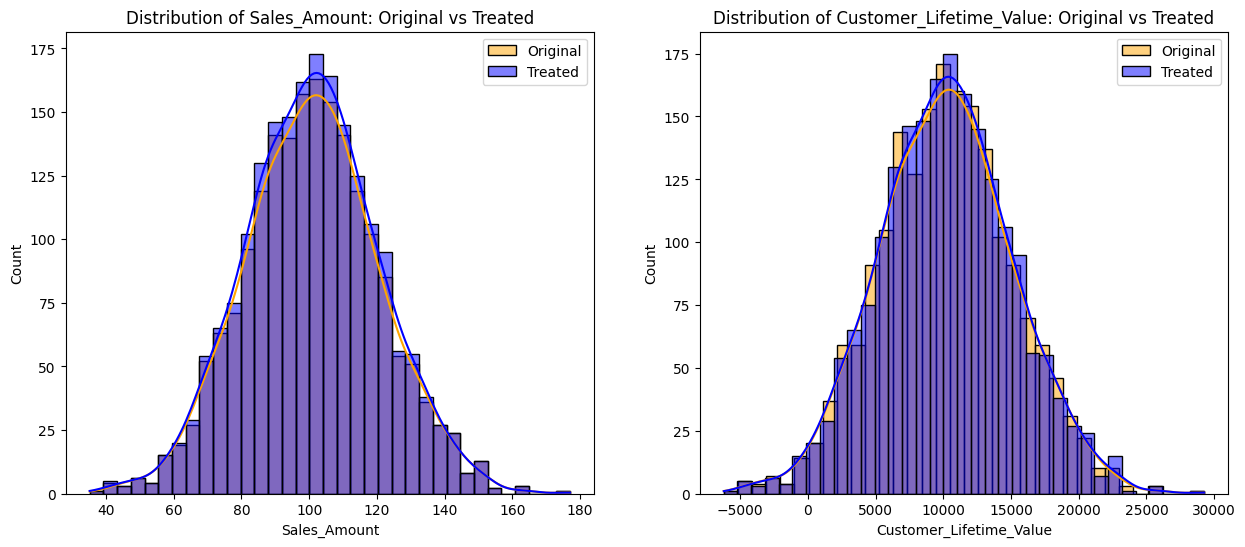

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first graph (Sales_Amount)
sns.histplot(df['Sales_Amount'], kde=True, label='Original', color='orange', ax=axes[0])
sns.histplot(df_test['Sales_Amount'], kde=True, label='Treated', color='blue', ax=axes[0])
axes[0].set_title('Distribution of Sales_Amount: Original vs Treated')
axes[0].set_xlabel('Sales_Amount')
axes[0].set_ylabel('Count')
axes[0].legend()

# Plot the second graph (Customer_Lifetime_Value)
sns.histplot(df['Customer_Lifetime_Value'], kde=True, label='Original', color='orange', ax=axes[1])
sns.histplot(df_test['Customer_Lifetime_Value'], kde=True, label='Treated', color='blue', ax=axes[1])
axes[1].set_title('Distribution of Customer_Lifetime_Value: Original vs Treated')
axes[1].set_xlabel('Customer_Lifetime_Value')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.show()

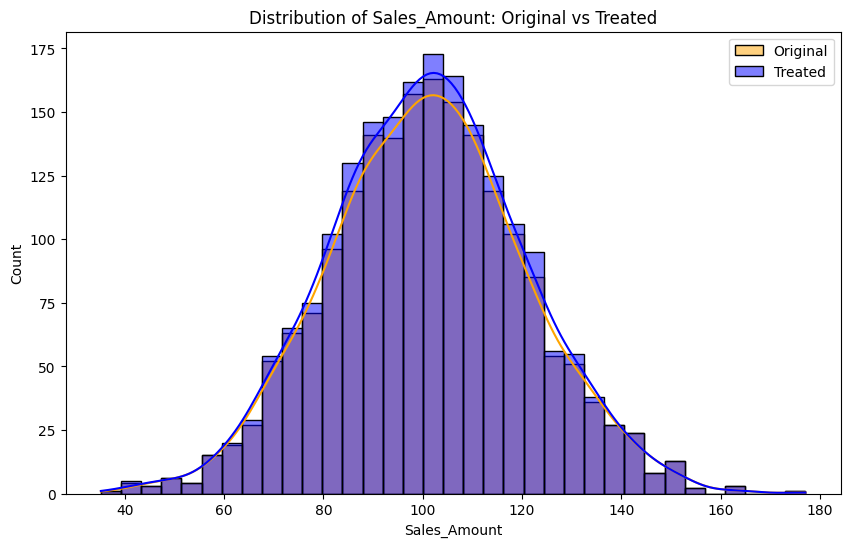

In [12]:
%matplotlib inline
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales_Amount'], kde=True, label='Original', color='orange')
sns.histplot(df_test['Sales_Amount'], kde=True, label='Treated', color='blue')
plt.title('Distribution of Sales_Amount: Original vs Treated')
plt.xlabel('Sales_Amount')
plt.ylabel('Count')
plt.legend()
plt.show()

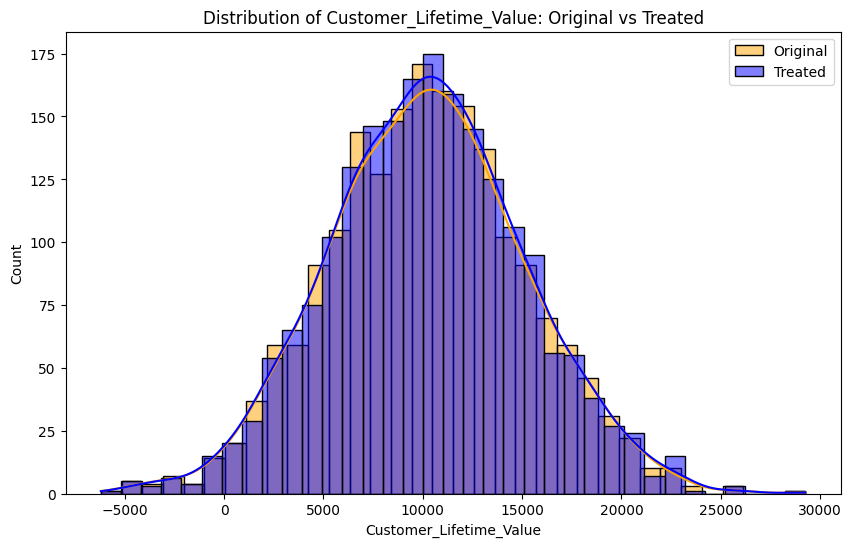

In [13]:
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_Lifetime_Value'], kde=True, label='Original', color='orange')
sns.histplot(df_test['Customer_Lifetime_Value'], kde=True, label='Treated', color='blue')
plt.title('Distribution of Customer_Lifetime_Value: Original vs Treated')
plt.xlabel('Customer_Lifetime_Value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [14]:
import scipy.stats as stats

# Extracting data for Edibility
data_original_Sales_Amount = df['Sales_Amount'].dropna()
data_treated_Sales_Amount = df_test['Sales_Amount']

# Extracting data for Odor
data_original_Customer_Lifetime_Value = df['Customer_Lifetime_Value'].dropna()
data_treated_Customer_Lifetime_Value = df_test['Customer_Lifetime_Value']

# Perform two-sample Kolmogorov-Smirnov test for Sales_Amount
ks_stat_Sales_Amount, p_value_Sales_Amount = stats.ks_2samp(data_original_Sales_Amount, data_treated_Sales_Amount)

# Perform two-sample Kolmogorov-Smirnov test for Customer_Lifetime_Value
ks_stat_Customer_Lifetime_Value, p_value_Customer_Lifetime_Value = stats.ks_2samp(data_original_Customer_Lifetime_Value, data_treated_Customer_Lifetime_Value)

# Create a list of tuples containing the KS-statistic and p-value for each variable
ks_tests = [
    ('Sales_Amount', ks_stat_Sales_Amount, p_value_Sales_Amount),
    ('Customer_Lifetime_Value', ks_stat_Customer_Lifetime_Value, p_value_Customer_Lifetime_Value),
]

# Create a DataFrame from the list of tuples
ks_df = pd.DataFrame(ks_tests, columns=['Variable', 'KS-statistic', 'p-value'])

# Display the DataFrame
ks_df

Variable  KS-statistic  p-value
0             Sales_Amount      0.002463      1.0
1  Customer_Lifetime_Value      0.003974      1.0

Percentage of outliers for Sales_Amount: 0.9%

Percentage of outliers for Customer_Age: 0.0%

Percentage of outliers for Transaction_Count: 0.95%

Percentage of outliers for Customer_Lifetime_Value: 0.85%

Percentage of outliers for Annual_Spend: 0.0%

Percentage of outliers for Average_Discount_Utilized: 0.0%

Percentage of outliers for Session_Duration_Minutes: 0.4%

Percentage of outliers for Page_Views_per_Session: 0.1%

Percentage of outliers for Ad_Clicks_per_Session: 0.75%

Percentage of outliers for Products_Viewed_per_Session: 1.75%



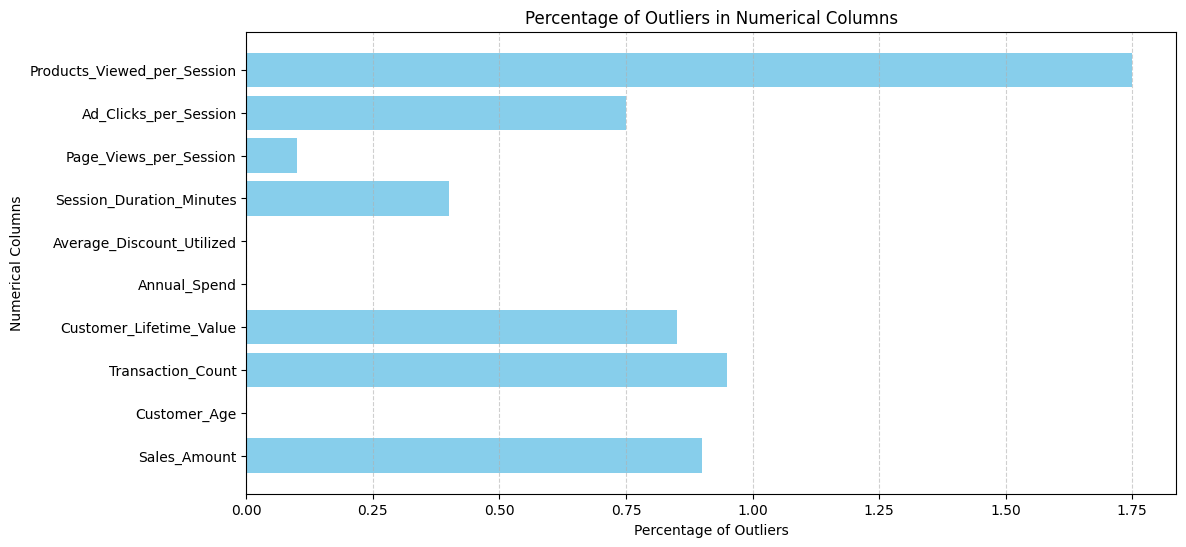

In [15]:
def calculate_percentage_of_outliers(df, column_name):
    # Calculate Interquartile Range
    Q1 = df_test[column_name].quantile(0.25)
    Q3 = df_test[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = ((df_test[column_name] < (Q1 - 1.5 * IQR)) | (df_test[column_name] > (Q3 + 1.5 * IQR)))

    # Calculate the percentage of outliers
    percentage_of_outliers = round((outliers.sum() / len(df)) * 100,2)

    return percentage_of_outliers

# Iterate over numerical columns
numerical_columns = df_test.select_dtypes(include=[np.number]).columns

for column in numerical_columns:
    percentage_outliers = calculate_percentage_of_outliers(df_test, column)
    print(f"Percentage of outliers for {column}: {percentage_outliers}%\n")

# Calculate percentage of outliers for each column
percentage_outliers_list = [calculate_percentage_of_outliers(df_test, column) for column in numerical_columns]
# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(numerical_columns, percentage_outliers_list, color='skyblue')
plt.xlabel('Percentage of Outliers')
plt.ylabel('Numerical Columns')
plt.title('Percentage of Outliers in Numerical Columns')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [16]:
df_test.describe(include='all')

Sales_Amount  Customer_Age  Transaction_Count Product_Category Region  \
count    2000.000000   2000.000000        2000.000000             2000   2000   
unique           NaN           NaN                NaN                4      4   
top              NaN           NaN                NaN                A  North   
freq             NaN           NaN                NaN              530    536   
mean      100.872482     40.522000           4.960500              NaN    NaN   
std        19.725519     13.454629           2.206666              NaN    NaN   
min        35.174653     18.000000           0.000000              NaN    NaN   
25%        87.574039     29.000000           3.000000              NaN    NaN   
50%       100.929726     40.000000           5.000000              NaN    NaN   
75%       113.601470     52.000000           6.000000              NaN    NaN   
max       177.054630     64.000000          15.000000              NaN    NaN   

       Repeat_Customer Income_Level  Customer_Lifetime_Value  Annual_Spend  \
count             2000         2000              2000.000000   2000.000000   
unique               2            3                      NaN           NaN   
top                 No          Low                      NaN           NaN   
freq              1011          739                      NaN           NaN   
mean               NaN          NaN             10214.603937   2708.771395   
std                NaN          NaN              4930.720471   1291.253298   
min                NaN          NaN             -6206.336700    500.052356   
25%                NaN          NaN              6893.509804   1593.738645   
50%                NaN          NaN             10210.485345   2703.354210   
75%                NaN          NaN             13400.367428   3803.921885   
max                NaN          NaN             29263.657450   4998.009665   

        Average_Discount_Utilized  Session_Duration_Minutes  \
count                 2000.000000               2000.000000   
unique                        NaN                       NaN   
top                           NaN                       NaN   
freq                          NaN                       NaN   
mean                    17.490709                 29.568050   
std                      7.260518                 10.242955   
min                      5.005676                 -2.210164   
25%                     11.183438                 22.536795   
50%                     17.324246                 29.479764   
75%                     23.908634                 36.794819   
max                     29.986517                 65.290552   

        Page_Views_per_Session  Ad_Clicks_per_Session  \
count              2000.000000            2000.000000   
unique                     NaN                    NaN   
top                        NaN                    NaN   
freq                       NaN                    NaN   
mean                  5.066500               2.048500   
std                   2.324173               1.437422   
min                   0.000000               0.000000   
25%                   3.000000               1.000000   
50%                   5.000000               2.000000   
75%                   7.000000               3.000000   
max                  15.000000               9.000000   

        Products_Viewed_per_Session Subscription_Status  
count                   2000.000000                2000  
unique                          NaN                   2  
top                             NaN          Subscribed  
freq                            NaN                1008  
mean                       3.943500                 NaN  
std                        1.940925                 NaN  
min                        0.000000                 NaN  
25%                        3.000000                 NaN  
50%                        4.000000                 NaN  
75%                        5.000000                 NaN  
max               

## 2. Sales Amount Analysis

### Analysing negative values in Customer_Lifetime_Value

In [18]:
min_index = df_test['Customer_Lifetime_Value'].idxmin()
min_row = df_test.loc[min_index]

min_row

Sales_Amount                        35.174653
Customer_Age                               24
Transaction_Count                           6
Product_Category                            C
Region                                  North
Repeat_Customer                           Yes
Income_Level                             High
Customer_Lifetime_Value            -6206.3367
Annual_Spend                      1613.031421
Average_Discount_Utilized             9.22025
Session_Duration_Minutes            30.339027
Page_Views_per_Session                      1
Ad_Clicks_per_Session                       3
Products_Viewed_per_Session                 2
Subscription_Status            Not_Subscribed
Name: 262, dtype: object

In [19]:
negative_values_df = df_test[df_test['Customer_Lifetime_Value'] < 0]
negative_values_df


Sales_Amount  Customer_Age  Transaction_Count Product_Category Region  \
74       47.605098            36                  5                A   West   
236      59.497148            34                  5                A  North   
262      35.174653            24                  6                C  North   
382      57.522086            32                  4                A   West   
431      59.215356            33                  3                D  North   
442      58.651158            58                  4                D  South   
471      53.961577            33                  4                B   East   
544      50.567110            45                  5                B   West   
566      59.237509            60                  5                D   East   
575      55.777294            33                 10                B  North   
646      46.062267            63                  5                A  North   
668      46.980604            22                  6                D  North   
671      58.532195            26                  4                C   East   
708      58.361412            59                  8                A  North   
933      56.023881            24                  3                D   East   
977      51.522413            51                  2                D   East   
991      59.165303            55                  6                B   West   
1061     43.029148            49                  2                C   East   
1101     42.074892            24                  6                D  North   
1151     56.932198            26                  4                D   East   
1160     50.011886            56                  8                D   East   
1289     56.942188            51                  3                A   East   
1346     48.921577            57                  3                C  South   
1355     48.179154            43                  4                B   West   
1539     42.554756            33                  2                C   East   
1562     51.515195            25                  4                C  North   
1591     41.572990            31                  2                A   West   
1594     52.741351            44                  7                B  South   
1662     57.562902            33                  7                C   West   
1712     56.546609            22                  2                D  North   
1750     45.935354            64                  7                A  North   
1816     56.963692            22                  3                D  South   
1926     49.394250            29                  3                B  South   
1956     57.286516            55                  5                D   West   
1971     39.748367            43                  7                A   West   

     Repeat_Customer Income_Level  Customer_Lifetime_Value  Annual_Spend  \
74               Yes          Low             -3098.725520   2452.178388   
236              Yes          Low              -125.712933   4342.032148   
262              Yes         High             -6206.336700   1613.031421   
382              Yes       Medium              -750.481480   3157.870253   
431              Yes         High              -213.570322   4866.156994   
442               No         High              -337.210500   1306.650254   
471               No          Low             -1509.605824   4026.919291   
544               No       Medium             -2358.222501   2295.658929   
566              Yes         High              -190.622676   1396.716514   
575              Yes         High             -1055.676545   2565.232325   
646               No       Medium             -3484.433215   2094.912270   
668              Yes          Low             -3254.849042   1243.780206   
671               No          Low              -366.951162   3795.804721   
708               No         High              -409.647039   3614.331412   
933              Yes 

In [20]:
grouped_df = df_test.groupby('Region')['Customer_Lifetime_Value'].mean().reset_index()
grouped_df


Region  Customer_Lifetime_Value
0   East             10029.632212
1  North             10284.228174
2  South             10287.024529
3   West             10242.059172

In [21]:
# Group by 'Region' and calculate the mean 'Annual_Spend' for each group
grouped_negative_df = negative_values_df.groupby('Region')['Customer_Lifetime_Value'].mean().reset_index()
grouped_negative_df


Region  Customer_Lifetime_Value
0   East             -1781.306235
1  North             -2339.292108
2  South             -1666.398595
3   West             -2218.628495

In [24]:
# Calculate total sales amount by region before dropping
total_sales_before_region = df_test.groupby('Region')['Sales_Amount'].sum()

# Drop customers with negative CLV
df_no_negative_clv = df_test[df_test['Customer_Lifetime_Value'] >= 0]

# Calculate total sales amount by region after dropping
total_sales_after_region = df_no_negative_clv.groupby('Region')['Sales_Amount'].sum()

# Compare the results
print("Total Sales Amount by Region Before Dropping Negative CLV:")
print(total_sales_before_region)

print("\nTotal Sales Amount by Region After Dropping Negative CLV:")
print(total_sales_after_region)

# Calculate the percentage decrease in total sales amount by region
percentage_decrease_by_region = round(((total_sales_before_region - total_sales_after_region) / total_sales_before_region) * 100,2)

# Print the percentage decrease for each region
print("\nPercentage Decrease in Total Sales Amount by Region:")
print(percentage_decrease_by_region)



Total Sales Amount by Region Before Dropping Negative CLV:
Region
East     47260.093786
North    54213.784906
South    51187.576081
West     49083.508837
Name: Sales_Amount, dtype: float64

Total Sales Amount by Region After Dropping Negative CLV:
Region
East     46731.346036
North    53656.644121
South    50920.904053
West     48624.299312
Name: Sales_Amount, dtype: float64

Percentage Decrease in Total Sales Amount by Region:
Region
East     1.12
North    1.03
South    0.52
West     0.94
Name: Sales_Amount, dtype: float64


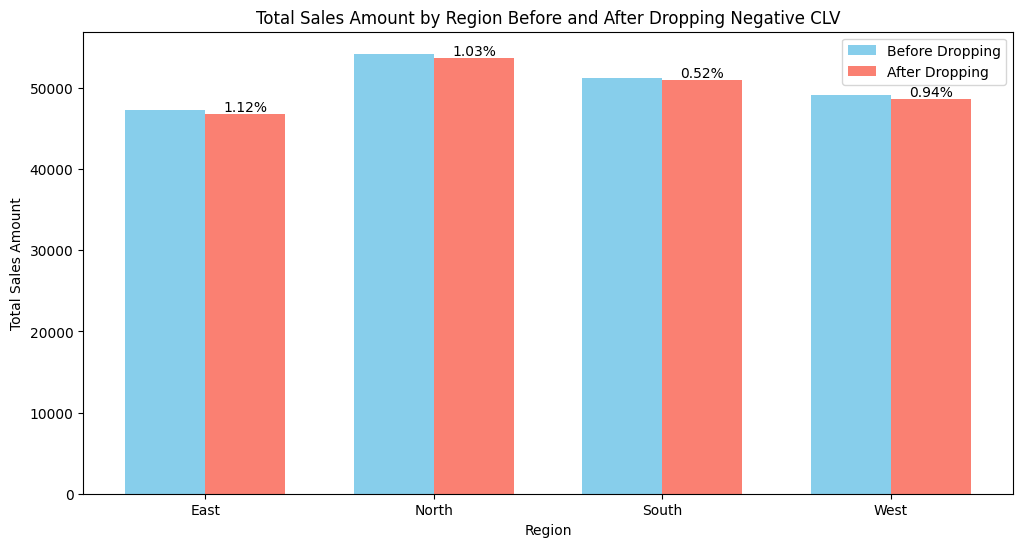

In [25]:
# Calculate the percentage decrease for regions
percentage_decrease_region = ((total_sales_before_region - total_sales_after_region) / total_sales_before_region) * 100

# Create an array of region names for the x-axis
regions = np.arange(len(total_sales_before_region))

# Set the width of the bars
bar_width = 0.35

# Create side-by-side bar plots for regions
plt.figure(figsize=(12, 6))
bar1_region = plt.bar(regions - bar_width/2, total_sales_before_region, bar_width, label='Before Dropping', color='skyblue')
bar2_region = plt.bar(regions + bar_width/2, total_sales_after_region, bar_width, label='After Dropping', color='salmon')

# Add labels and title for regions
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Region Before and After Dropping Negative CLV')
plt.xticks(regions, total_sales_before_region.index)
plt.legend()

# Annotate the bars with percentage decrease for regions
for i, value in enumerate(percentage_decrease_region):
    plt.text(bar2_region[i].get_x() + bar2_region[i].get_width() / 2, bar2_region[i].get_height(),
             f'{value:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

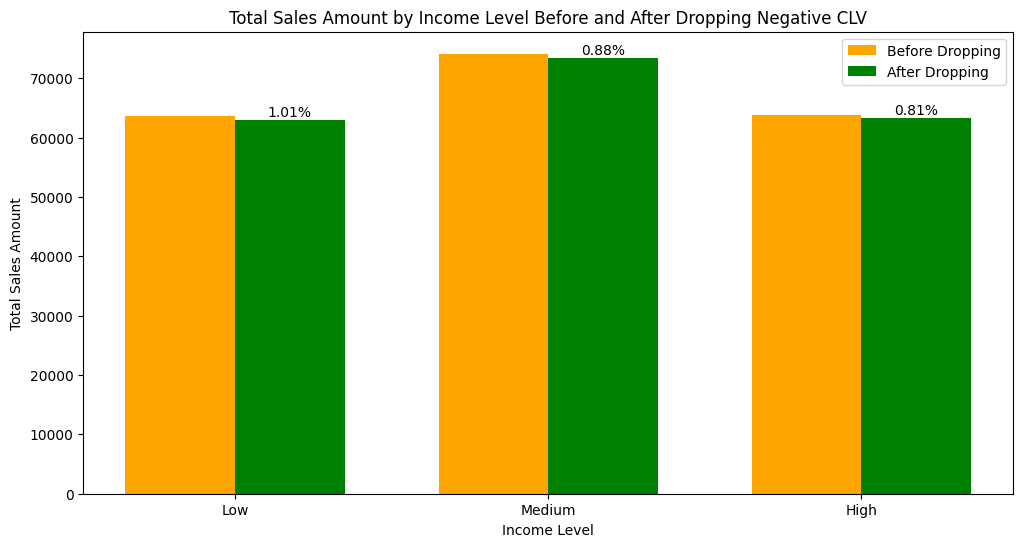

In [26]:
# Define the order of income levels
income_order = ['Low', 'Medium', 'High']

# Calculate total sales amount by income level before dropping
total_sales_before = df_test.groupby('Income_Level')['Sales_Amount'].sum()

# Drop customers with negative CLV
df_no_negative_clv = df_test[df_test['Customer_Lifetime_Value'] >= 0]

# Calculate total sales amount by income level after dropping
total_sales_after = df_no_negative_clv.groupby('Income_Level')['Sales_Amount'].sum()

# Calculate the percentage decrease
percentage_decrease = ((total_sales_before - total_sales_after) / total_sales_before) * 100

# Create an array of income levels for the x-axis
income_levels = np.arange(len(total_sales_before))

# Set the width of the bars
bar_width = 0.35

# Create side-by-side bar plots
plt.figure(figsize=(12, 6))
bar1 = plt.bar(income_levels - bar_width/2, total_sales_before, bar_width, label='Before Dropping', color='orange')
bar2 = plt.bar(income_levels + bar_width/2, total_sales_after, bar_width, label='After Dropping', color='green')

# Add labels and title
plt.xlabel('Income Level')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Income Level Before and After Dropping Negative CLV')
plt.xticks(income_levels, income_order)  # Set the x-axis ticks based on the defined order
plt.legend()

# Annotate the bars with percentage decrease
for i, value in enumerate(percentage_decrease):
    plt.text(bar2[i].get_x() + bar2[i].get_width() / 2, bar2[i].get_height(),
             f'{value:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

plt.show()

## 3. Geographic Analysis

In [94]:
df_test.groupby('Region')['Sales_Amount'].sum().reset_index()

Region  Sales_Amount
0   East  47260.093786
1  North  54213.784906
2  South  51187.576081
3   West  49083.508837

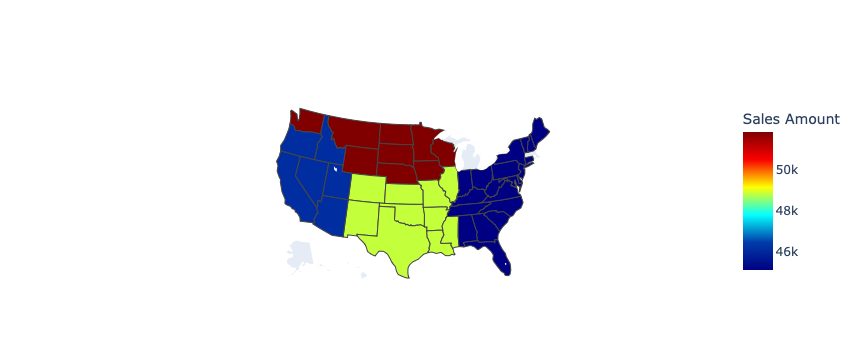

In [131]:
import plotly.graph_objects as go

# Sales data for each region
region_sales_data = [
    {'Region': 'East', 'Sales_Amount': 45082.106237},
    {'Region': 'North', 'Sales_Amount': 51828.859760},
    {'Region': 'South', 'Sales_Amount': 48810.649085},
    {'Region': 'West', 'Sales_Amount': 46113.146591},
]

# Reassign states to different regions
state_regions = {
    'North': ['WA','MT','WY','ND','SD','MN','IA','WI','NE'],
    'South': ['CO','NM','KS','OK','TX','MO','AR','LA','MS','IL'],
    'East': ['IN','KY','LT','TN','AL','GA','FL','SC','NC','VA','WV','OH','PA','MD','DE','NY','VT','ME','NH','CT','NJ'],
    'West': ['CA', 'OR','ID', 'NV', 'UT', 'AZ']
}
#state_regions['North'].remove('ND')
#state_regions['North'].append('CA')
#state_regions['South'].remove('TX')
#state_regions['South'].append('ND')
#state_regions['East'].remove('NY')
#state_regions['West'].remove('CA')
#state_regions['West'].append('CA')

# Create a new dataframe with the sales data for each region
region_sales_df = pd.DataFrame(region_sales_data)

# Reassign sales data based on the updated regions
sales_data = {}
for region, states in state_regions.items():
    sales_data[region] = region_sales_df[region_sales_df['Region'] == region]['Sales_Amount'].values[0]

# Create a dictionary of location to sales amount
location_sales = {}
for location, region in state_regions.items():
    for state in region:
        location_sales[state] = sales_data[location]

# Create the choropleth map using go.Choropleth
data = go.Choropleth(
    type='choropleth',
    locations=list(location_sales.keys()),
    locationmode='USA-states',
    colorscale='Jet',
    text=list(location_sales.keys()),
    z=list(location_sales.values()),
    colorbar={'title': 'Sales Amount'},
)

# Create the layout with the geo scope set to 'usa'
layout = go.Layout(
    geo=go.layout.Geo(
        scope='usa'
    )
)

# Create the figure with the data and layout
choromap = go.Figure(data=[data], layout=layout)

# Show the figure
choromap.show()

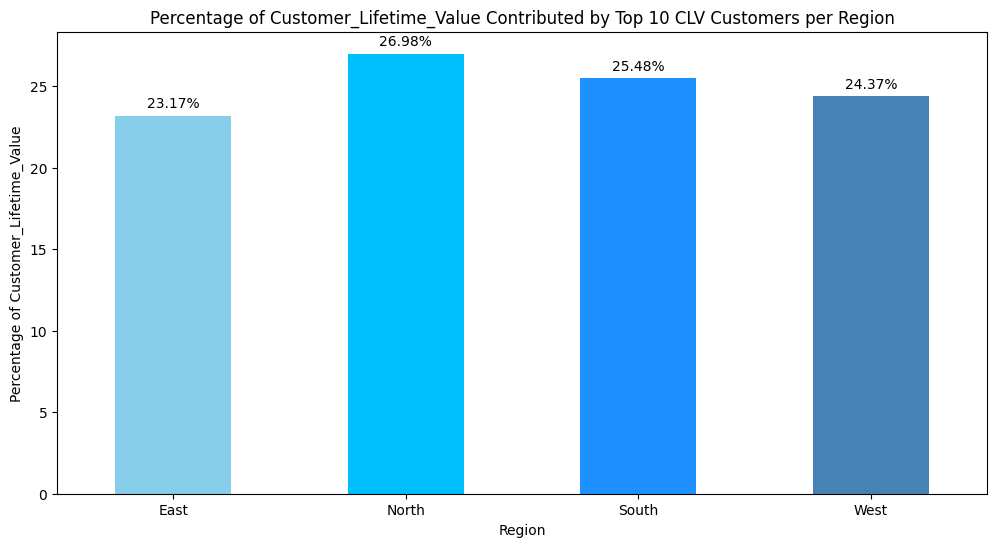

In [27]:
# Define the number of top customers to display
top_n_customers = 10

# Group by region and sum CLV for each customer
clv_sum_per_customer = df_test.groupby(['Region'])['Customer_Lifetime_Value'].sum()

# Get the top N customers with the highest CLV sum per region
top_clv_customers_per_region = clv_sum_per_customer.groupby('Region').nlargest(top_n_customers)

# Calculate the total sales amount per region
total_sales_per_region = df_test.groupby('Region')['Customer_Lifetime_Value'].sum()

# Calculate the percentage of sales amount contributed by each group of top customers per region
percentage_sales_by_top_customers = (top_clv_customers_per_region.groupby('Region').sum() / total_sales_per_region.sum()) * 100

# Define a color palette
colors = ['skyblue', 'deepskyblue', 'dodgerblue', 'steelblue', 'mediumslateblue', 'mediumaquamarine', 'mediumseagreen', 'lightseagreen', 'mediumspringgreen', 'limegreen']

# Plot the percentage of sales amount contributed by top customers per region using the color palette
plt.figure(figsize=(12, 6))
percentage_sales_by_top_customers.plot(kind='bar', color=colors)
plt.title('Percentage of Customer_Lifetime_Value Contributed by Top 10 CLV Customers per Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Customer_Lifetime_Value')
plt.xticks(rotation=0)

# Annotate each bar with the percentage value
for i, percentage in enumerate(percentage_sales_by_top_customers):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')

plt.show()

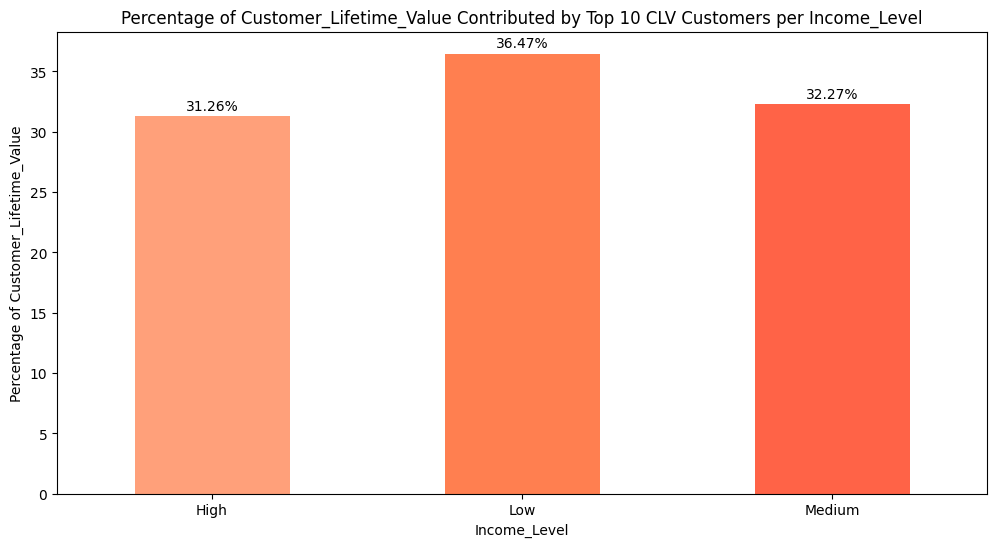

In [28]:
top_n_customers = 10

# Group by region and sum CLV for each customer
clv_sum_per_customer = df_test.groupby(['Income_Level'])['Customer_Lifetime_Value'].sum()

# Get the top N customers with the highest CLV sum per region
top_clv_customers_per_region = clv_sum_per_customer.groupby('Income_Level').nlargest(top_n_customers)

# Calculate the total sales amount per region
total_sales_per_region = df_test.groupby('Income_Level')['Customer_Lifetime_Value'].sum()

# Calculate the percentage of sales amount contributed by each group of top customers per region
percentage_sales_by_top_customers = (top_clv_customers_per_region.groupby('Income_Level').sum() / total_sales_per_region.sum()) * 100

# Define a color palette
orange_palette = ['#FFA07A', '#FF7F50', '#FF6347', '#FF4500', '#FF8C00', '#FFA500', '#FFD700', '#FFECB3', '#FFE4B5', '#FFDAB9']

# Plot the percentage of sales amount contributed by top customers per region using the color palette
plt.figure(figsize=(12, 6))
percentage_sales_by_top_customers.plot(kind='bar', color=orange_palette)
plt.title('Percentage of Customer_Lifetime_Value Contributed by Top 10 CLV Customers per Income_Level')
plt.xlabel('Income_Level')
plt.ylabel('Percentage of Customer_Lifetime_Value')
plt.xticks(rotation=0)

# Annotate each bar with the percentage value
for i, percentage in enumerate(percentage_sales_by_top_customers):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center')

plt.show()

## 4. Customer Engagement Analysis

- ### Annual Spend and Platform Usage Metrics
- ### Platform Metrics Overview
- ### Product and Customer Characteristics

In [17]:
numerical_columns = df_test.select_dtypes(include=['number']).columns
categorical_columns = df_test.select_dtypes(include=['object']).columns

# Print min, max, and mean for numerical columns
for column in numerical_columns:
    print(f"{column} - Min: {df_test[column].min()}, Max: {df_test[column].max()}, Mean: {df_test[column].mean()}\n")

# Print unique values, top value, and most frequent value for categorical columns
for column in categorical_columns:
    print(f"{column} - Unique values: {df_test[column].unique()}, Top value: {df_test[column].mode().iloc[0]}, Most frequent value: {df_test[column].value_counts().idxmax()}\n")
    

Sales_Amount - Min: 35.1746532, Max: 177.0546298, Mean: 100.8724818051975

Customer_Age - Min: 18, Max: 64, Mean: 40.522

Transaction_Count - Min: 0, Max: 15, Mean: 4.9605

Customer_Lifetime_Value - Min: -6206.3367, Max: 29263.65745, Mean: 10214.603937258324

Annual_Spend - Min: 500.0523564, Max: 4998.009665, Mean: 2708.7713945159503

Average_Discount_Utilized - Min: 5.005675955, Max: 29.98651703, Mean: 17.4907093310375

Session_Duration_Minutes - Min: -2.21016356, Max: 65.29055188, Mean: 29.568049600455502

Page_Views_per_Session - Min: 0, Max: 15, Mean: 5.0665

Ad_Clicks_per_Session - Min: 0, Max: 9, Mean: 2.0485

Products_Viewed_per_Session - Min: 0, Max: 13, Mean: 3.9435

Product_Category - Unique values: ['B' 'C' 'A' 'D'], Top value: A, Most frequent value: A

Region - Unique values: ['East' 'North' 'West' 'South'], Top value: North, Most frequent value: North

Repeat_Customer - Unique values: ['Yes' 'No'], Top value: No, Most frequent value: No

Income_Level - Unique values: ['Lo

##### Analysing negative values in Session_Duration_Minutes

In [33]:
min_index_session_time = df_test['Session_Duration_Minutes'].idxmin()
min_index_session_time = df_test.loc[min_index_session_time]

min_index_session_time

Sales_Amount                     87.465656
Customer_Age                            38
Transaction_Count                        5
Product_Category                         A
Region                               South
Repeat_Customer                        Yes
Income_Level                        Medium
Customer_Lifetime_Value        6866.413877
Annual_Spend                   1709.589268
Average_Discount_Utilized        18.865512
Session_Duration_Minutes         -2.210164
Page_Views_per_Session                   2
Ad_Clicks_per_Session                    0
Products_Viewed_per_Session              3
Subscription_Status             Subscribed
Name: 1982, dtype: object

In [34]:
negative_values_session_time = df_test[df_test['Session_Duration_Minutes'] < 0]
negative_values_session_time

Sales_Amount  Customer_Age  Transaction_Count Product_Category Region  \
1982     87.465656            38                  5                A  South   

     Repeat_Customer Income_Level  Customer_Lifetime_Value  Annual_Spend  \
1982             Yes       Medium              6866.413877   1709.589268   

      Average_Discount_Utilized  Session_Duration_Minutes  \
1982                  18.865512                 -2.210164   

      Page_Views_per_Session  Ad_Clicks_per_Session  \
1982                       2                      0   

      Products_Viewed_per_Session Subscription_Status  
1982                            3          Subscribed

In [35]:
df_test['Session_Duration_Minutes'] = df_test['Session_Duration_Minutes'].abs()
df_test[df_test['Session_Duration_Minutes'] < 0]

Empty DataFrame
Columns: [Sales_Amount, Customer_Age, Transaction_Count, Product_Category, Region, Repeat_Customer, Income_Level, Customer_Lifetime_Value, Annual_Spend, Average_Discount_Utilized, Session_Duration_Minutes, Page_Views_per_Session, Ad_Clicks_per_Session, Products_Viewed_per_Session, Subscription_Status]
Index: []

In [36]:
numerical_columns = df_test.select_dtypes(include=['number']).columns
categorical_columns = df_test.select_dtypes(include=['object']).columns

# Print min, max, and mean for numerical columns
for column in numerical_columns:
    print(f"{column} - Min: {df_test[column].min()}, Max: {df_test[column].max()}, Mean: {df_test[column].mean()}\n")

# Print unique values, top value, and most frequent value for categorical columns
for column in categorical_columns:
    print(f"{column} - Unique values: {df_test[column].unique()}, Top value: {df_test[column].mode().iloc[0]}, Most frequent value: {df_test[column].value_counts().idxmax()}\n")
    

Sales_Amount - Min: 35.1746532, Max: 177.0546298, Mean: 100.8724818051975

Customer_Age - Min: 18, Max: 64, Mean: 40.522

Transaction_Count - Min: 0, Max: 15, Mean: 4.9605

Customer_Lifetime_Value - Min: -6206.3367, Max: 29263.65745, Mean: 10214.603937258324

Annual_Spend - Min: 500.0523564, Max: 4998.009665, Mean: 2708.7713945159503

Average_Discount_Utilized - Min: 5.005675955, Max: 29.98651703, Mean: 17.4907093310375

Session_Duration_Minutes - Min: 1.004861201, Max: 65.29055188, Mean: 29.5702597640155

Page_Views_per_Session - Min: 0, Max: 15, Mean: 5.0665

Ad_Clicks_per_Session - Min: 0, Max: 9, Mean: 2.0485

Products_Viewed_per_Session - Min: 0, Max: 13, Mean: 3.9435

Product_Category - Unique values: ['B' 'C' 'A' 'D'], Top value: A, Most frequent value: A

Region - Unique values: ['East' 'North' 'West' 'South'], Top value: North, Most frequent value: North

Repeat_Customer - Unique values: ['Yes' 'No'], Top value: No, Most frequent value: No

Income_Level - Unique values: ['Low'

In [ ]:
#from ydata_profiling import ProfileReport

# Create a profile report
#profile = ProfileReport(df)

# Save the report to an HTML file
#profile.to_file("your_dataset_report.html")

- ### Data Quality checks

##### Checking for duplicates

In [37]:
duplicate_rows = df_test[df_test.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [Sales_Amount, Customer_Age, Transaction_Count, Product_Category, Region, Repeat_Customer, Income_Level, Customer_Lifetime_Value, Annual_Spend, Average_Discount_Utilized, Session_Duration_Minutes, Page_Views_per_Session, Ad_Clicks_per_Session, Products_Viewed_per_Session, Subscription_Status]
Index: []

- ### Correlation Analysis

##### Turning Categorical Variables int Quantitative Variables

In [38]:
df_test

Sales_Amount  Customer_Age  Transaction_Count Product_Category Region  \
0       109.934283            26                  7                B   East   
1        97.234714            62                  3                B  North   
2       112.953771            26                  6                B   East   
3       130.460597            43                  2                C  North   
4        95.316933            21                  4                A   East   
...            ...           ...                ...              ...    ...   
1995    121.403005            59                  4                D  North   
1996     99.469575            23                  4                D  North   
1997     82.362507            36                  2                C  North   
1998     96.901604            20                  3                D   West   
1999     85.101947            35                  4                B   East   

     Repeat_Customer Income_Level  Customer_Lifetime_Value  Annual_Spend  \
0                Yes          Low             12483.570770   2331.979201   
1                Yes       Medium              9308.678494    797.044299   
2                 No       Medium             13238.442690   2069.692403   
3                 No       Medium             17615.149280    999.491445   
4                 No          Low              8829.233126   4137.058445   
...              ...          ...                      ...           ...   
1995              No         High             15350.751190   1774.779816   
1996              No       Medium              9867.393704   2301.407763   
1997              No          Low              5590.626744   4153.397558   
1998             Yes          Low              9184.665180    562.379612   
1999             Yes         High              6275.486776   3422.204691   

      Average_Discount_Utilized  Session_Duration_Minutes  \
0                     21.721913                 28.158542   
1                     24.966395                 18.698213   
2                     28.318823                 32.730107   
3                      5.503446                  9.253600   
4                      8.844593                 29.080432   
...                         ...                       ...   
1995                  11.714973                 36.604600   
1996                  17.370649                 26.145068   
1997                   7.152903                  9.286228   
1998                  18.978416                 41.677419   
1999                  17.569586                 22.249550   

      Page_Views_per_Session  Ad_Clicks_per_Session  \
0                          4                      6   
1                          4                      2   
2                          5                      0   
3                          5                      0   
4                          6                      2   
...                      ...                    ...   
1995                       7                      0   
1996                       4                      9   
1997                       4                      0   
1998                       3                      0   
1999                       6                      0   

      Products_Viewed_per_Session Subscription_Status  
0                               1      Not_Subscribed  
1                               5      Not_Subscribed  
2                               6          Subscribed  
3                               5      Not_Subscribed  
4                               2      Not_Subscribed  
...                           ...                 ...  
1995                            2      Not_Subscribed  
1996                            4      Not_Subscribed  
1997                            2          Subscribed  
1998                            3      Not_Subscribed  
1999                            4      Not_Subscribed  

[2000 rows x 15 columns]

In [39]:
# Encoding 'Repeat_Customer' to 1 for 'Yes' and 0 for 'No'
df_test['Repeat_Customer_encoded'] = df_test['Repeat_Customer'].map({'Yes': 1, 'No': 0})
df_test


Sales_Amount  Customer_Age  Transaction_Count Product_Category Region  \
0       109.934283            26                  7                B   East   
1        97.234714            62                  3                B  North   
2       112.953771            26                  6                B   East   
3       130.460597            43                  2                C  North   
4        95.316933            21                  4                A   East   
...            ...           ...                ...              ...    ...   
1995    121.403005            59                  4                D  North   
1996     99.469575            23                  4                D  North   
1997     82.362507            36                  2                C  North   
1998     96.901604            20                  3                D   West   
1999     85.101947            35                  4                B   East   

     Repeat_Customer Income_Level  Customer_Lifetime_Value  Annual_Spend  \
0                Yes          Low             12483.570770   2331.979201   
1                Yes       Medium              9308.678494    797.044299   
2                 No       Medium             13238.442690   2069.692403   
3                 No       Medium             17615.149280    999.491445   
4                 No          Low              8829.233126   4137.058445   
...              ...          ...                      ...           ...   
1995              No         High             15350.751190   1774.779816   
1996              No       Medium              9867.393704   2301.407763   
1997              No          Low              5590.626744   4153.397558   
1998             Yes          Low              9184.665180    562.379612   
1999             Yes         High              6275.486776   3422.204691   

      Average_Discount_Utilized  Session_Duration_Minutes  \
0                     21.721913                 28.158542   
1                     24.966395                 18.698213   
2                     28.318823                 32.730107   
3                      5.503446                  9.253600   
4                      8.844593                 29.080432   
...                         ...                       ...   
1995                  11.714973                 36.604600   
1996                  17.370649                 26.145068   
1997                   7.152903                  9.286228   
1998                  18.978416                 41.677419   
1999                  17.569586                 22.249550   

      Page_Views_per_Session  Ad_Clicks_per_Session  \
0                          4                      6   
1                          4                      2   
2                          5                      0   
3                          5                      0   
4                          6                      2   
...                      ...                    ...   
1995                       7                      0   
1996                       4                      9   
1997                       4                      0   
1998                       3                      0   
1999                       6                      0   

      Products_Viewed_per_Session Subscription_Status  Repeat_Customer_encoded  
0                               1      Not_Subscribed                        1  
1                               5      Not_Subscribed                        1  
2                               6          Subscribed                        0  
3                               5      Not_Subscribed                        0  
4                               2      Not_Subscribed                        0  
...                           ...                 ...                      ...  
1995                            2      Not_Subscribed                        0  
1996                            4      Not_Subscribed                        0  
1997                 

In [40]:
# One-hot encoding 

df_encoded = pd.get_dummies(df_test['Subscription_Status'], columns=['Subscription_Status'], prefix='', prefix_sep='')

# Create 'gas' and 'diesel' columns based on the one-hot encoding
df_test['Subscribed'] = df_encoded['Subscribed'].astype(int)
df_test['Not_Subscribed'] = df_encoded['Not_Subscribed'].astype(int)

df_test


Sales_Amount  Customer_Age  Transaction_Count Product_Category Region  \
0       109.934283            26                  7                B   East   
1        97.234714            62                  3                B  North   
2       112.953771            26                  6                B   East   
3       130.460597            43                  2                C  North   
4        95.316933            21                  4                A   East   
...            ...           ...                ...              ...    ...   
1995    121.403005            59                  4                D  North   
1996     99.469575            23                  4                D  North   
1997     82.362507            36                  2                C  North   
1998     96.901604            20                  3                D   West   
1999     85.101947            35                  4                B   East   

     Repeat_Customer Income_Level  Customer_Lifetime_Value  Annual_Spend  \
0                Yes          Low             12483.570770   2331.979201   
1                Yes       Medium              9308.678494    797.044299   
2                 No       Medium             13238.442690   2069.692403   
3                 No       Medium             17615.149280    999.491445   
4                 No          Low              8829.233126   4137.058445   
...              ...          ...                      ...           ...   
1995              No         High             15350.751190   1774.779816   
1996              No       Medium              9867.393704   2301.407763   
1997              No          Low              5590.626744   4153.397558   
1998             Yes          Low              9184.665180    562.379612   
1999             Yes         High              6275.486776   3422.204691   

      Average_Discount_Utilized  Session_Duration_Minutes  \
0                     21.721913                 28.158542   
1                     24.966395                 18.698213   
2                     28.318823                 32.730107   
3                      5.503446                  9.253600   
4                      8.844593                 29.080432   
...                         ...                       ...   
1995                  11.714973                 36.604600   
1996                  17.370649                 26.145068   
1997                   7.152903                  9.286228   
1998                  18.978416                 41.677419   
1999                  17.569586                 22.249550   

      Page_Views_per_Session  Ad_Clicks_per_Session  \
0                          4                      6   
1                          4                      2   
2                          5                      0   
3                          5                      0   
4                          6                      2   
...                      ...                    ...   
1995                       7                      0   
1996                       4                      9   
1997                       4                      0   
1998                       3                      0   
1999                       6                      0   

      Products_Viewed_per_Session Subscription_Status  \
0                               1      Not_Subscribed   
1                               5      Not_Subscribed   
2                               6          Subscribed   
3                               5      Not_Subscribed   
4                               2      Not_Subscribed   
...                           ...                 ...   
1995                            2      Not_Subscribed   
1996                            4      Not_Subscribed   
1997                            2          Subscribed   
1998                            3      Not_Subscribed   
1999                            4      Not_Subscribed   

      Repeat_Customer_encoded  Subscribed  Not_Subscribed  
0    

##### Applying Binning to Customer_Age

In [41]:
bins = np.linspace(min(df_test['Customer_Age']),max(df_test['Customer_Age']),4)
bins = np.round(bins, decimals=0)
bins

array([18., 33., 49., 64.])

In [42]:
# We would like three bins of equal bin width, so we need four numbers 
# as dividers that are equal distance apart
bins = np.linspace(min(df_test['Customer_Age']),max(df_test['Customer_Age']),4)
bins = np.round(bins, decimals=0)

# We create a list group underscore names that contains the 
# different bin names.
group_names = ['<33','33-49','>49']

# We use the Pandas function cut to segment and sort the data values 
# into bins.
df_test['Customer_Age_binned'] = pd.cut(df_test['Customer_Age'],bins,labels=group_names, include_lowest=True)
df_test


Sales_Amount  Customer_Age  Transaction_Count Product_Category Region  \
0       109.934283            26                  7                B   East   
1        97.234714            62                  3                B  North   
2       112.953771            26                  6                B   East   
3       130.460597            43                  2                C  North   
4        95.316933            21                  4                A   East   
...            ...           ...                ...              ...    ...   
1995    121.403005            59                  4                D  North   
1996     99.469575            23                  4                D  North   
1997     82.362507            36                  2                C  North   
1998     96.901604            20                  3                D   West   
1999     85.101947            35                  4                B   East   

     Repeat_Customer Income_Level  Customer_Lifetime_Value  Annual_Spend  \
0                Yes          Low             12483.570770   2331.979201   
1                Yes       Medium              9308.678494    797.044299   
2                 No       Medium             13238.442690   2069.692403   
3                 No       Medium             17615.149280    999.491445   
4                 No          Low              8829.233126   4137.058445   
...              ...          ...                      ...           ...   
1995              No         High             15350.751190   1774.779816   
1996              No       Medium              9867.393704   2301.407763   
1997              No          Low              5590.626744   4153.397558   
1998             Yes          Low              9184.665180    562.379612   
1999             Yes         High              6275.486776   3422.204691   

      Average_Discount_Utilized  Session_Duration_Minutes  \
0                     21.721913                 28.158542   
1                     24.966395                 18.698213   
2                     28.318823                 32.730107   
3                      5.503446                  9.253600   
4                      8.844593                 29.080432   
...                         ...                       ...   
1995                  11.714973                 36.604600   
1996                  17.370649                 26.145068   
1997                   7.152903                  9.286228   
1998                  18.978416                 41.677419   
1999                  17.569586                 22.249550   

      Page_Views_per_Session  Ad_Clicks_per_Session  \
0                          4                      6   
1                          4                      2   
2                          5                      0   
3                          5                      0   
4                          6                      2   
...                      ...                    ...   
1995                       7                      0   
1996                       4                      9   
1997                       4                      0   
1998                       3                      0   
1999                       6                      0   

      Products_Viewed_per_Session Subscription_Status  \
0                               1      Not_Subscribed   
1                               5      Not_Subscribed   
2                               6          Subscribed   
3                               5      Not_Subscribed   
4                               2      Not_Subscribed   
...                           ...                 ...   
1995                            2      Not_Subscribed   
1996                            4      Not_Subscribed   
1997                            2          Subscribed   
1998                            3      Not_Subscribed   
1999                            4      Not_Subscribed   

      Repeat_Customer_encoded  Subscribed  Not_Subscribed Custome

##### Applying Min Max to Transaction_Count

In [43]:
df_test['Transaction_Count_min_max'] = (df_test['Transaction_Count']-df_test['Transaction_Count'].min())/(df_test['Transaction_Count'].max()-df_test['Transaction_Count'].min())
df_test


Sales_Amount  Customer_Age  Transaction_Count Product_Category Region  \
0       109.934283            26                  7                B   East   
1        97.234714            62                  3                B  North   
2       112.953771            26                  6                B   East   
3       130.460597            43                  2                C  North   
4        95.316933            21                  4                A   East   
...            ...           ...                ...              ...    ...   
1995    121.403005            59                  4                D  North   
1996     99.469575            23                  4                D  North   
1997     82.362507            36                  2                C  North   
1998     96.901604            20                  3                D   West   
1999     85.101947            35                  4                B   East   

     Repeat_Customer Income_Level  Customer_Lifetime_Value  Annual_Spend  \
0                Yes          Low             12483.570770   2331.979201   
1                Yes       Medium              9308.678494    797.044299   
2                 No       Medium             13238.442690   2069.692403   
3                 No       Medium             17615.149280    999.491445   
4                 No          Low              8829.233126   4137.058445   
...              ...          ...                      ...           ...   
1995              No         High             15350.751190   1774.779816   
1996              No       Medium              9867.393704   2301.407763   
1997              No          Low              5590.626744   4153.397558   
1998             Yes          Low              9184.665180    562.379612   
1999             Yes         High              6275.486776   3422.204691   

      Average_Discount_Utilized  Session_Duration_Minutes  \
0                     21.721913                 28.158542   
1                     24.966395                 18.698213   
2                     28.318823                 32.730107   
3                      5.503446                  9.253600   
4                      8.844593                 29.080432   
...                         ...                       ...   
1995                  11.714973                 36.604600   
1996                  17.370649                 26.145068   
1997                   7.152903                  9.286228   
1998                  18.978416                 41.677419   
1999                  17.569586                 22.249550   

      Page_Views_per_Session  Ad_Clicks_per_Session  \
0                          4                      6   
1                          4                      2   
2                          5                      0   
3                          5                      0   
4                          6                      2   
...                      ...                    ...   
1995                       7                      0   
1996                       4                      9   
1997                       4                      0   
1998                       3                      0   
1999                       6                      0   

      Products_Viewed_per_Session Subscription_Status  \
0                               1      Not_Subscribed   
1                               5      Not_Subscribed   
2                               6          Subscribed   
3                               5      Not_Subscribed   
4                               2      Not_Subscribed   
...                           ...                 ...   
1995                            2      Not_Subscribed   
1996                            4      Not_Subscribed   
1997                            2          Subscribed   
1998                            3      Not_Subscribed   
1999                            4      Not_Subscribed   

      Repeat_Customer_encoded  Subscribed  Not_Subscribed Custome

#### Applying Min Max to Session_Duration_Minutes

In [44]:
df_test['Session_Duration_zscore'] = (df_test['Session_Duration_Minutes']-df_test['Session_Duration_Minutes'].mean())/df_test['Session_Duration_Minutes'].std()
df_test


Sales_Amount  Customer_Age  Transaction_Count Product_Category Region  \
0       109.934283            26                  7                B   East   
1        97.234714            62                  3                B  North   
2       112.953771            26                  6                B   East   
3       130.460597            43                  2                C  North   
4        95.316933            21                  4                A   East   
...            ...           ...                ...              ...    ...   
1995    121.403005            59                  4                D  North   
1996     99.469575            23                  4                D  North   
1997     82.362507            36                  2                C  North   
1998     96.901604            20                  3                D   West   
1999     85.101947            35                  4                B   East   

     Repeat_Customer Income_Level  Customer_Lifetime_Value  Annual_Spend  \
0                Yes          Low             12483.570770   2331.979201   
1                Yes       Medium              9308.678494    797.044299   
2                 No       Medium             13238.442690   2069.692403   
3                 No       Medium             17615.149280    999.491445   
4                 No          Low              8829.233126   4137.058445   
...              ...          ...                      ...           ...   
1995              No         High             15350.751190   1774.779816   
1996              No       Medium              9867.393704   2301.407763   
1997              No          Low              5590.626744   4153.397558   
1998             Yes          Low              9184.665180    562.379612   
1999             Yes         High              6275.486776   3422.204691   

      Average_Discount_Utilized  ...  Page_Views_per_Session  \
0                     21.721913  ...                       4   
1                     24.966395  ...                       4   
2                     28.318823  ...                       5   
3                      5.503446  ...                       5   
4                      8.844593  ...                       6   
...                         ...  ...                     ...   
1995                  11.714973  ...                       7   
1996                  17.370649  ...                       4   
1997                   7.152903  ...                       4   
1998                  18.978416  ...                       3   
1999                  17.569586  ...                       6   

      Ad_Clicks_per_Session  Products_Viewed_per_Session  Subscription_Status  \
0                         6                            1       Not_Subscribed   
1                         2                            5       Not_Subscribed   
2                         0                            6           Subscribed   
3                         0                            5       Not_Subscribed   
4                         2                            2       Not_Subscribed   
...                     ...                          ...                  ...   
1995                      0                            2       Not_Subscribed   
1996                      9                            4       Not_Subscribed   
1997                      0                            2           Subscribed   
1998                      0                            3       Not_Subscribed   
1999                      0                            4       Not_Subscribed   

     Repeat_Customer_encoded  Subscribed  Not_Subscribed  Customer_Age_binned  \
0                          1           0               1                  <33   
1                          1           0               1                  >49   
2                          0           1               0                  <33   
3                          0           0               1                33-49 

In [45]:
df_treated = df_test.copy()

# List of columns to drop
columns_to_drop = ['Customer_Age', 'Transaction_Count','Repeat_Customer','Subscription_Status','Session_Duration_Minutes']

# Drop the specified columns
df_treated = df_treated.drop(columns=columns_to_drop)

df_treated


Sales_Amount Product_Category Region Income_Level  \
0       109.934283                B   East          Low   
1        97.234714                B  North       Medium   
2       112.953771                B   East       Medium   
3       130.460597                C  North       Medium   
4        95.316933                A   East          Low   
...            ...              ...    ...          ...   
1995    121.403005                D  North         High   
1996     99.469575                D  North       Medium   
1997     82.362507                C  North          Low   
1998     96.901604                D   West          Low   
1999     85.101947                B   East         High   

      Customer_Lifetime_Value  Annual_Spend  Average_Discount_Utilized  \
0                12483.570770   2331.979201                  21.721913   
1                 9308.678494    797.044299                  24.966395   
2                13238.442690   2069.692403                  28.318823   
3                17615.149280    999.491445                   5.503446   
4                 8829.233126   4137.058445                   8.844593   
...                       ...           ...                        ...   
1995             15350.751190   1774.779816                  11.714973   
1996              9867.393704   2301.407763                  17.370649   
1997              5590.626744   4153.397558                   7.152903   
1998              9184.665180    562.379612                  18.978416   
1999              6275.486776   3422.204691                  17.569586   

      Page_Views_per_Session  Ad_Clicks_per_Session  \
0                          4                      6   
1                          4                      2   
2                          5                      0   
3                          5                      0   
4                          6                      2   
...                      ...                    ...   
1995                       7                      0   
1996                       4                      9   
1997                       4                      0   
1998                       3                      0   
1999                       6                      0   

      Products_Viewed_per_Session  Repeat_Customer_encoded  Subscribed  \
0                               1                        1           0   
1                               5                        1           0   
2                               6                        0           1   
3                               5                        0           0   
4                               2                        0           0   
...                           ...                      ...         ...   
1995                            2                        0           0   
1996                            4                        0           0   
1997                            2                        0           1   
1998                            3                        1           0   
1999                            4                        1           0   

      Not_Subscribed Customer_Age_binned  Transaction_Count_min_max  \
0                  1                 <33                   0.466667   
1                  1                 >49                   0.200000   
2                  0                 <33                   0.400000   
3                  1               33-49                   0.133333   
4                  1                 <33                   0.266667   
...              ...                 ...                        ...   
1995               1                 >49                   0.266667   
1996               1                 <33                   0.266667   
1997               0               33-49                   0.133333   
1998               1                 <33                   0.200000   
1999               1               33-49                   0.266667   

     

In [47]:
df_treated.isnull().sum()

Sales_Amount                   0
Product_Category               0
Region                         0
Income_Level                   0
Customer_Lifetime_Value        0
Annual_Spend                   0
Average_Discount_Utilized      0
Page_Views_per_Session         0
Ad_Clicks_per_Session          0
Products_Viewed_per_Session    0
Repeat_Customer_encoded        0
Subscribed                     0
Not_Subscribed                 0
Customer_Age_binned            0
Transaction_Count_min_max      0
Session_Duration_zscore        0
dtype: int64

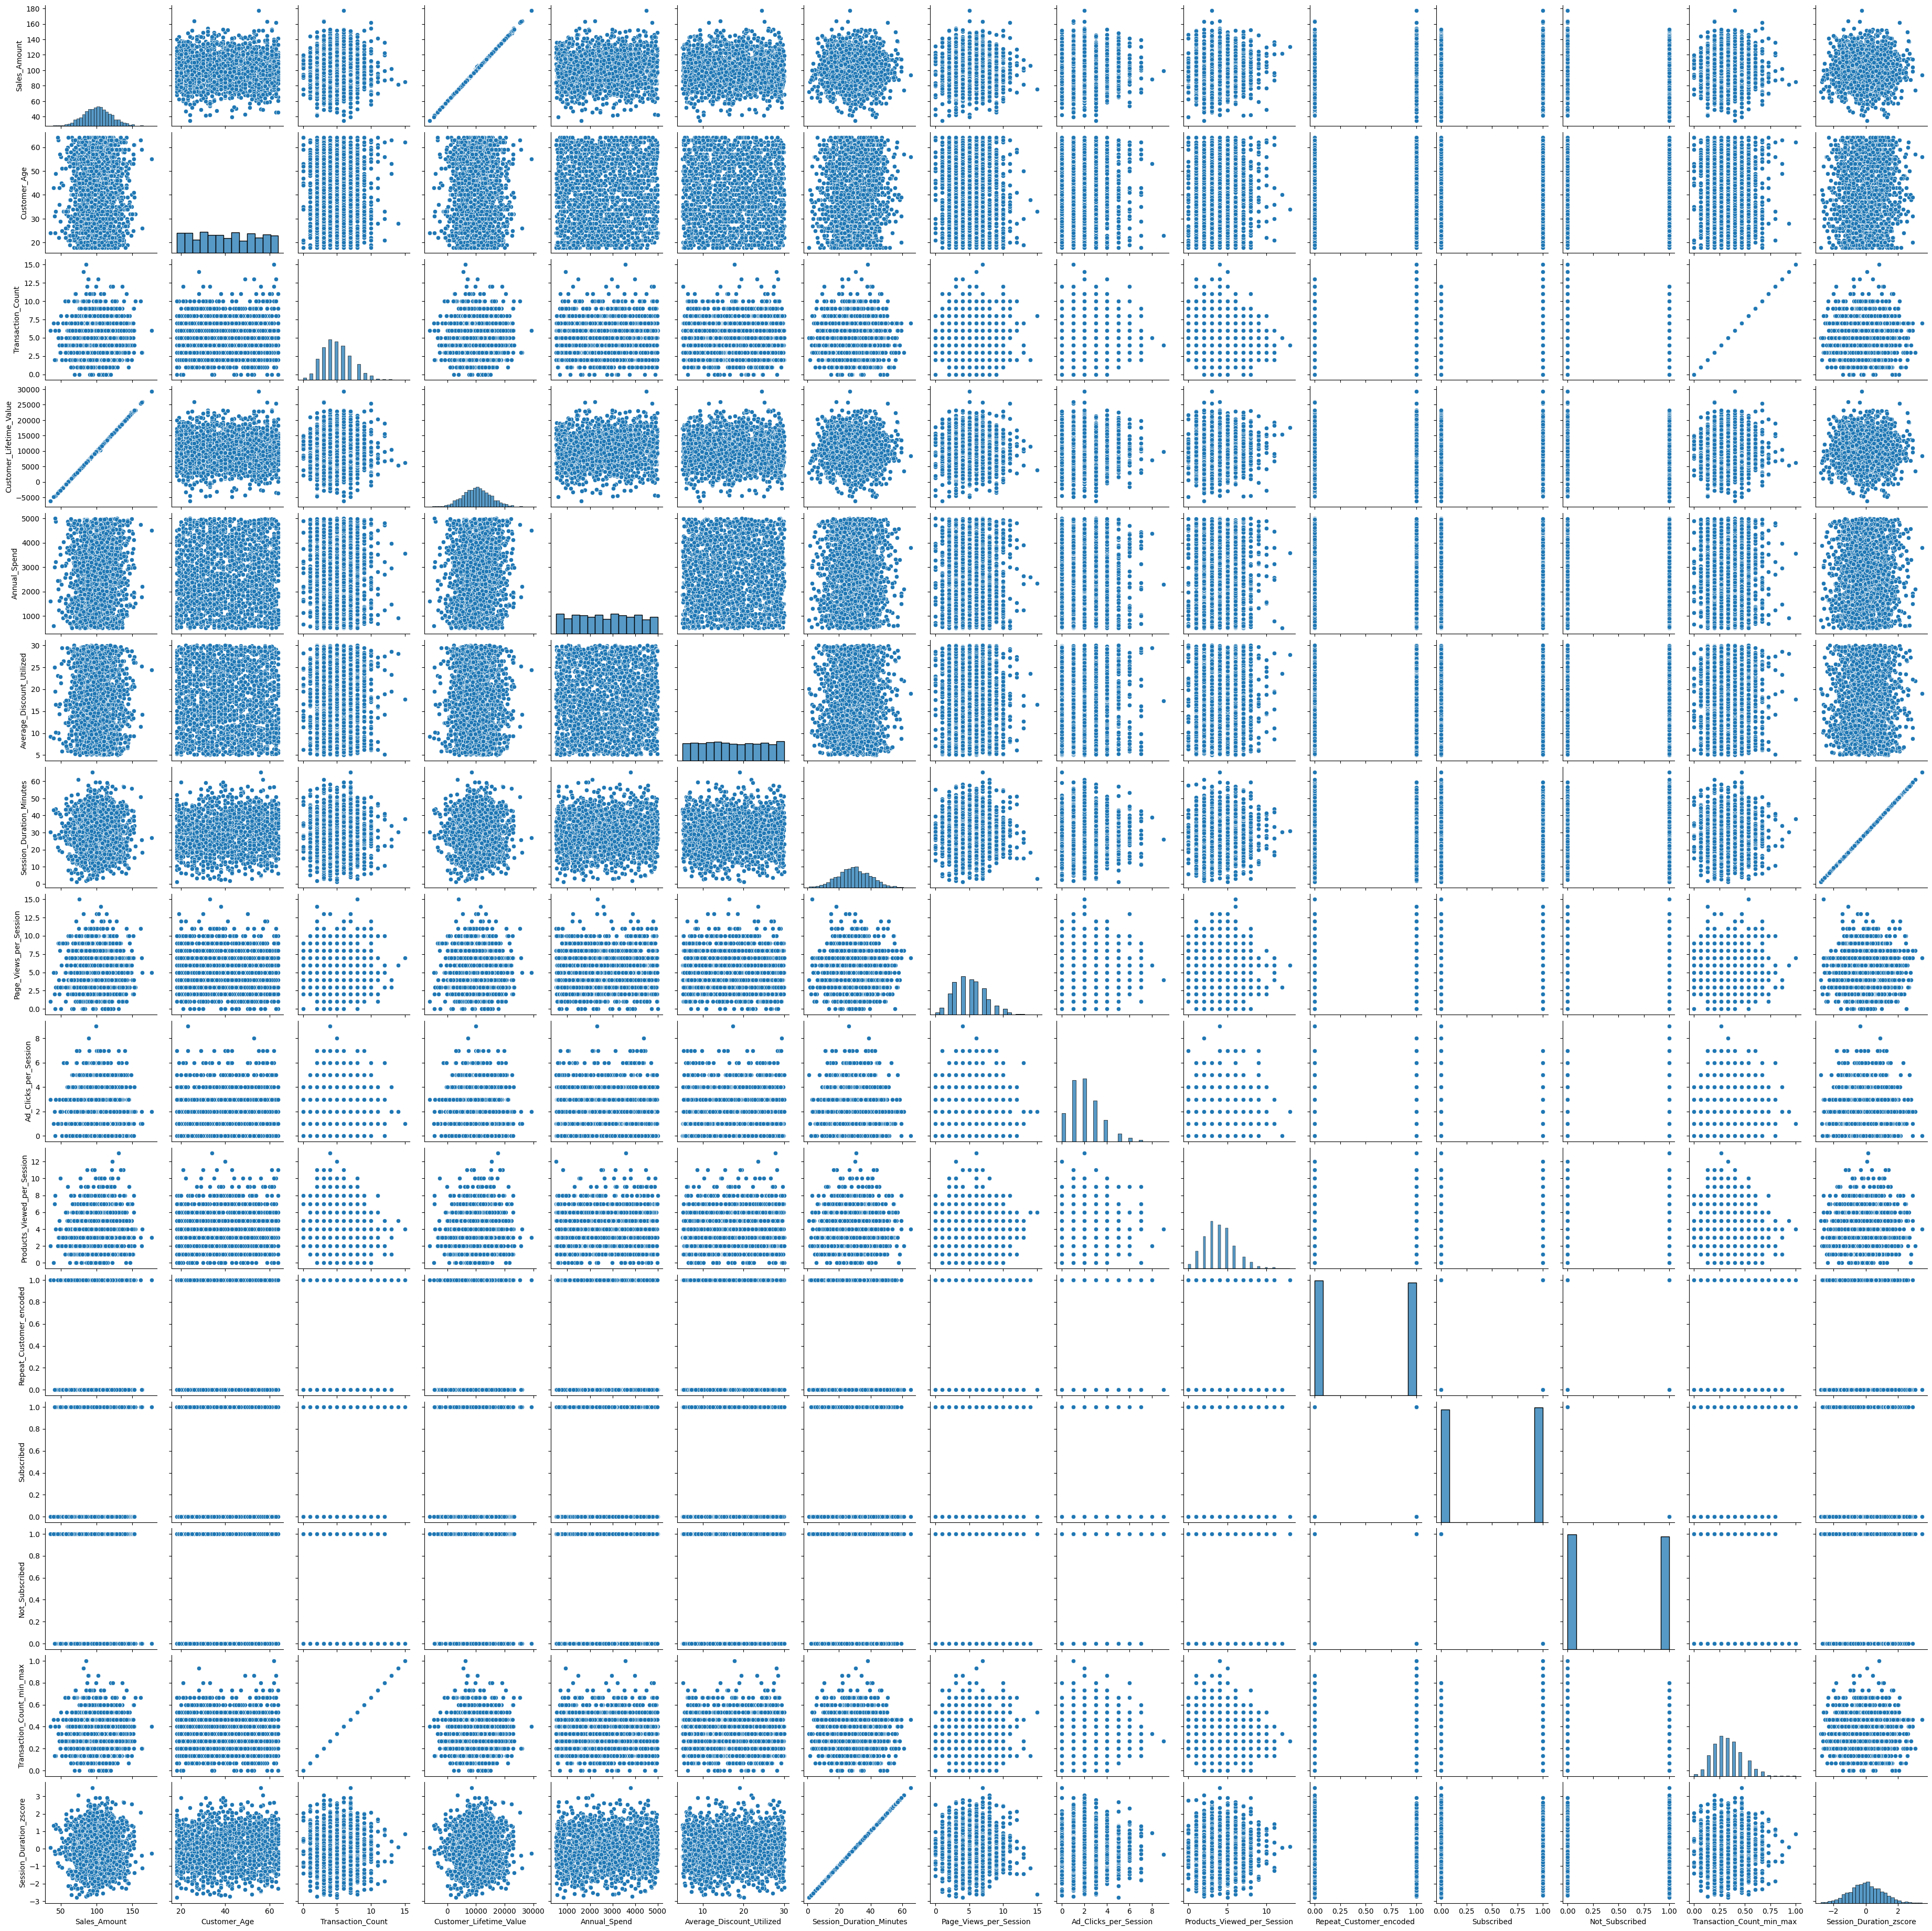

In [138]:
sns.pairplot(df_test)

##### Correlation Matrix

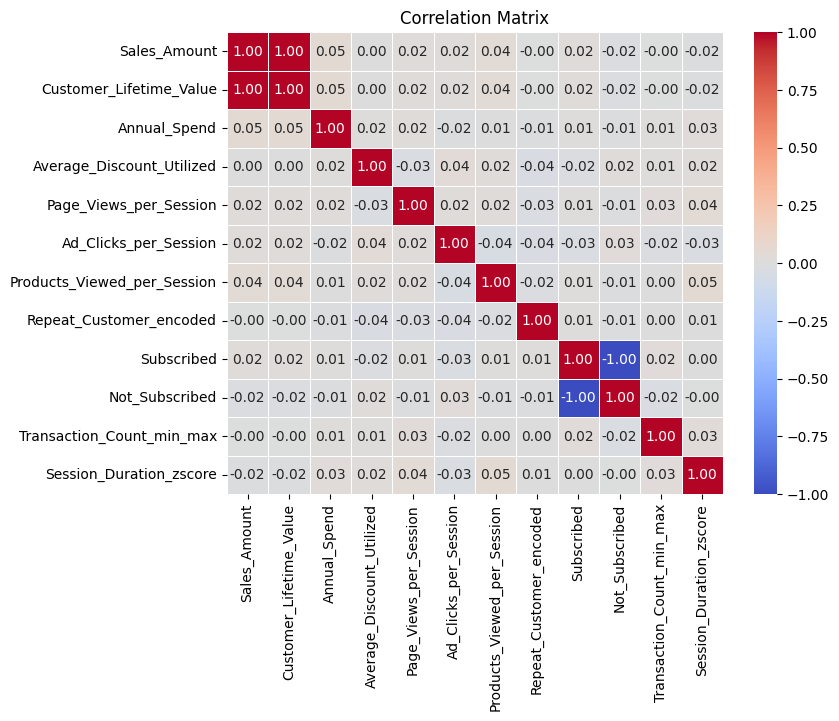

In [48]:
# Select only the numerical columns
numerical_columns = df_treated.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
# print("Correlation Matrix:")
# print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

##### Checking Pearson Correlation

In [50]:
from scipy import stats

# Select only numerical columns
numerical_columns = df_test.select_dtypes(include='number').columns

# Loop through numerical columns
for column in numerical_columns:
    if column != 'Sales_Amount':
        pearson_coef, p_value = stats.pearsonr(df_test[column], df_test['Sales_Amount'])
        # Interpretation of the results
        print(f'Analysis between {column} and Sales_Amount:')
        print(f'Pearson correlation coefficient: {pearson_coef}')
        print(f'P-value: {p_value}')
        
        if abs(pearson_coef) >= 0.7:
            print('Correlation Coefficient: Large relationship')
        elif 0.3 <= abs(pearson_coef) < 0.7:
            print('Correlation Coefficient: Moderate relationship')
        else:
            print('Correlation Coefficient: No significant relationship')
        
        if p_value < 0.001:
            print('P-value: Strong certainty in the result')
        elif p_value < 0.05:
            print('P-value: Moderate certainty in the result')
        elif p_value < 0.1:
            print('P-value: Weak certainty in the result')
        else:
            print('P-value: No certainty in the result')
        
        print('\n')


Analysis between Customer_Age and Sales_Amount:
Pearson correlation coefficient: 0.025293098161192476
P-value: 0.2582169874648921
Correlation Coefficient: No significant relationship
P-value: No certainty in the result


Analysis between Transaction_Count and Sales_Amount:
Pearson correlation coefficient: -0.001518275450558079
P-value: 0.9458995228693463
Correlation Coefficient: No significant relationship
P-value: No certainty in the result


Analysis between Customer_Lifetime_Value and Sales_Amount:
Pearson correlation coefficient: 0.9999533769981199
P-value: 0.0
Correlation Coefficient: Large relationship
P-value: Strong certainty in the result


Analysis between Annual_Spend and Sales_Amount:
Pearson correlation coefficient: 0.05161523958730024
P-value: 0.020976937104058707
Correlation Coefficient: No significant relationship
P-value: Moderate certainty in the result


Analysis between Average_Discount_Utilized and Sales_Amount:
Pearson correlation coefficient: 0.003416609815903859

##### Correlation between Customer Lifetime Value and Sales Amount

Text(0.5, 1.0, 'Scatter Plot of Customer_Lifetime_Value vs Sales_Amount')

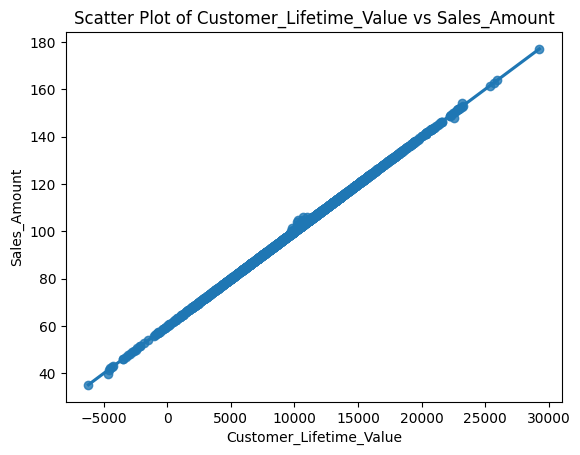

In [57]:
sns.regplot(x='Customer_Lifetime_Value', y='Sales_Amount', data=df_test)
plt.title('Scatter Plot of Customer_Lifetime_Value vs Sales_Amount')


### Creating a pivot to create a correlation matrix

In [51]:
df_test.columns

Index(['Sales_Amount', 'Customer_Age', 'Transaction_Count', 'Product_Category',
       'Region', 'Repeat_Customer', 'Income_Level', 'Customer_Lifetime_Value',
       'Annual_Spend', 'Average_Discount_Utilized', 'Session_Duration_Minutes',
       'Page_Views_per_Session', 'Ad_Clicks_per_Session',
       'Products_Viewed_per_Session', 'Subscription_Status',
       'Repeat_Customer_encoded', 'Subscribed', 'Not_Subscribed',
       'Customer_Age_binned', 'Transaction_Count_min_max',
       'Session_Duration_zscore'],
      dtype='object')

In [52]:
df_test_2 = df_test[['Page_Views_per_Session', 'Ad_Clicks_per_Session','Annual_Spend']]
df_grp = df_test_2.groupby(['Page_Views_per_Session', 'Ad_Clicks_per_Session'],as_index=False).mean()

df_grp

Page_Views_per_Session  Ad_Clicks_per_Session  Annual_Spend
0                        0                      0   2939.435184
1                        0                      1   3002.046163
2                        0                      2   2300.879210
3                        0                      3   3117.232279
4                        0                      4   3286.277309
..                     ...                    ...           ...
93                      13                      1   1245.874009
94                      13                      2   3108.794955
95                      13                      6   2646.050479
96                      14                      2   2594.016203
97                      15                      2   2330.621604

[98 rows x 3 columns]

In [53]:
df_pivot = df_grp.pivot(index = 'Page_Views_per_Session', columns='Ad_Clicks_per_Session')

df_pivot

Annual_Spend                                         \
Ad_Clicks_per_Session             0            1            2            3   
Page_Views_per_Session                                                       
0                       2939.435184  3002.046163  2300.879210  3117.232279   
1                       3058.955621  2469.086703  2536.680844  2688.286176   
2                       2530.362133  2870.761547  2647.713827  2768.017591   
3                       2268.476366  2463.266658  2718.727150  2840.476710   
4                       2488.543996  2958.244321  2789.701719  2686.344187   
5                       2584.629747  2720.362183  2506.317547  2945.323357   
6                       3147.530759  2923.923457  2773.342276  2697.195237   
7                       2319.728685  2928.464811  2930.833150  2357.454811   
8                       2934.294931  2702.333278  2783.178863  2426.475162   
9                       3411.377489  2493.784700  2576.561249  2358.377126   
10                      2792.651684  2500.068041  2660.545300  3226.089270   
11                      3914.493142  3712.812074  2898.169500  3261.466922   
12                      1225.484654  1541.638462          NaN  4248.110947   
13                              NaN  1245.874009  3108.794955          NaN   
14                              NaN          NaN  2594.016203          NaN   
15                              NaN          NaN  2330.621604          NaN   

                                                                            \
Ad_Clicks_per_Session             4            5            6            7   
Page_Views_per_Session                                                       
0                       3286.277309   974.054680          NaN          NaN   
1                       3786.407554  1256.916451          NaN  2361.392037   
2                       2653.158195  3134.428966  3894.553172          NaN   
3                       2310.772888  2445.304324  2106.363166  4267.038325   
4                       2420.423058  2668.913095  2437.350889  1974.418178   
5                       2830.976591  2544.734445  2274.404715  4409.541472   
6                       2410.592071  2550.537842  2972.863038  2155.036945   
7                       2867.907741  2618.737023  2351.249426  3980.801945   
8                       2800.460105  3479.330206          NaN  1031.504412   
9                       2078.757734  2873.013761  3445.928091  3780.414777   
10                      2059.864702  1439.062729  2830.822375          NaN   
11                      3008.017263          NaN          NaN          NaN   
12                      2931.347330          NaN          NaN          NaN   
13                              NaN          NaN  2646.050479          NaN   
14                              NaN          NaN          NaN          NaN   
15                              NaN          NaN          NaN          NaN   

                                                  
Ad_Clicks_per_Session             8            9  
Page_Views_per_Session                            
0                               NaN          NaN  
1                               NaN          NaN  
2                               NaN          NaN  
3                               NaN          NaN  
4                               NaN  2301.407763  
5                               NaN          NaN  
6                       4379.913381          NaN  
7                               NaN          NaN  
8                               NaN          NaN  
9                               NaN          NaN  
10                              NaN          NaN  
11                              NaN          NaN  
12                              NaN          NaN  
13                              NaN          NaN  
14                              NaN          NaN  
15                              NaN          NaN

/var/folders/ss/2rd8cvtn1mjfqfkj8dfsp6fc0000gn/T/ipykernel_20472/681619114.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


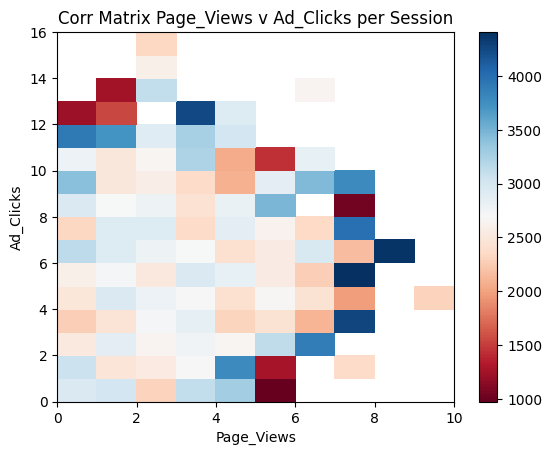

In [54]:
plt.pcolor(df_pivot,cmap='RdBu', linewidths=1.0)
plt.colorbar()
plt.title('Corr Matrix Page_Views v Ad_Clicks per Session')
plt.xlabel('Page_Views')
plt.ylabel('Ad_Clicks')
plt.show()

In [55]:
# Calculate the sum of the entire pivot table
total_sales = df_pivot.sum()

# Divide each value by the total and multiply by 100
df_pivot_percentage = (df_pivot / total_sales) * 100
df_pivot_percentage

Annual_Spend                                  \
Ad_Clicks_per_Session             0          1         2          3   
Page_Views_per_Session                                                
0                          8.253139   8.217430  5.729840   8.285917   
1                          8.588720   6.758572  6.317052   7.145735   
2                          7.104573   7.858067  6.593556   7.357669   
3                          6.369268   6.742641  6.770399   7.550273   
4                          6.987159   8.097532  6.947146   7.140573   
5                          7.256942   7.446383  6.241439   7.828966   
6                          8.837416   8.003586  6.906406   7.169416   
7                          6.513171   8.016017  7.298603   6.266352   
8                          8.238707   7.397033  6.930902   6.449815   
9                          9.578226   6.826178  6.416366   6.268803   
10                         7.841011   6.843377  6.625510   8.575270   
11                        10.990839  10.162992  7.217261   8.669307   
12                         3.440830   4.219890       NaN  11.291906   
13                              NaN   3.410301  7.741778        NaN   
14                              NaN        NaN  6.459834        NaN   
15                              NaN        NaN  5.803907        NaN   

                                                                           \
Ad_Clicks_per_Session           4          5          6          7      8   
Page_Views_per_Session                                                      
0                        9.271493   3.748522        NaN        NaN    NaN   
1                       10.682498   4.837078        NaN   9.855499    NaN   
2                        7.485290  12.062440  15.603437        NaN    NaN   
3                        6.519327   9.410434   8.439095  17.808898    NaN   
4                        6.828680  10.270963   9.765190   8.240426    NaN   
5                        7.986965   9.793077   9.112350  18.403649    NaN   
6                        6.800944   9.815411  11.910707   8.994256  100.0   
7                        8.091157  10.077867   9.420226  16.614263    NaN   
8                        7.900869  13.389747        NaN   4.305084    NaN   
9                        5.864748  11.056417  13.806031  15.777927    NaN   
10                       5.811446   5.538045  11.341624        NaN    NaN   
11                       8.486445        NaN        NaN        NaN    NaN   
12                       8.270138        NaN        NaN        NaN    NaN   
13                            NaN        NaN  10.601340        NaN    NaN   
14                            NaN        NaN        NaN        NaN    NaN   
15                            NaN        NaN        NaN        NaN    NaN   

                               
Ad_Clicks_per_Session       9  
Page_Views_per_Session         
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                       100.0  
5                         NaN  
6                         NaN  
7                         NaN  
8                         NaN  
9                         NaN  
10                        NaN  
11                        NaN  
12                        NaN  
13                        NaN  
14                        NaN  
15                        NaN

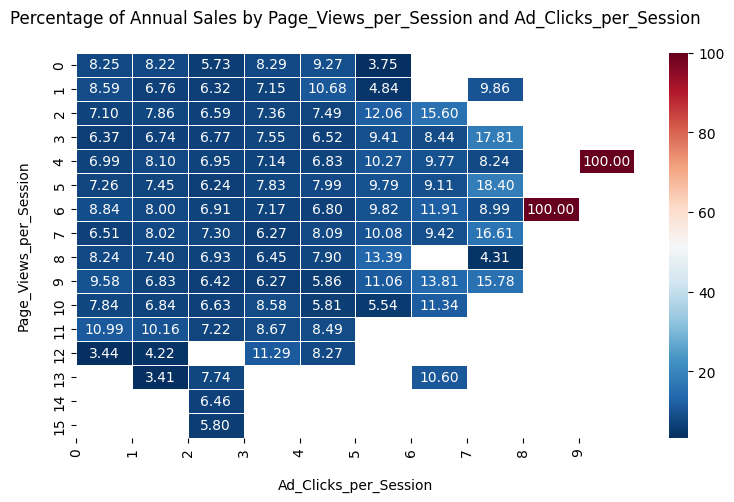

In [56]:
# Extract the column numbers from the existing column names
column_numbers = [col[1] for col in df_pivot_percentage.columns]

# Plot the heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(df_pivot_percentage, cmap='RdBu_r', annot=True, fmt='.2f', linewidths=0.5)

# Set custom labels for the x-axis
plt.xticks(ticks=range(len(df_pivot_percentage.columns)), labels=column_numbers)

plt.title('Percentage of Annual Sales by Page_Views_per_Session and Ad_Clicks_per_Session\n')
plt.xlabel('\nAd_Clicks_per_Session')
plt.ylabel('Page_Views_per_Session\n')

plt.show()

## Demographic Anaysis

In [58]:
df_test

Sales_Amount  Customer_Age  Transaction_Count Product_Category Region  \
0       109.934283            26                  7                B   East   
1        97.234714            62                  3                B  North   
2       112.953771            26                  6                B   East   
3       130.460597            43                  2                C  North   
4        95.316933            21                  4                A   East   
...            ...           ...                ...              ...    ...   
1995    121.403005            59                  4                D  North   
1996     99.469575            23                  4                D  North   
1997     82.362507            36                  2                C  North   
1998     96.901604            20                  3                D   West   
1999     85.101947            35                  4                B   East   

     Repeat_Customer Income_Level  Customer_Lifetime_Value  Annual_Spend  \
0                Yes          Low             12483.570770   2331.979201   
1                Yes       Medium              9308.678494    797.044299   
2                 No       Medium             13238.442690   2069.692403   
3                 No       Medium             17615.149280    999.491445   
4                 No          Low              8829.233126   4137.058445   
...              ...          ...                      ...           ...   
1995              No         High             15350.751190   1774.779816   
1996              No       Medium              9867.393704   2301.407763   
1997              No          Low              5590.626744   4153.397558   
1998             Yes          Low              9184.665180    562.379612   
1999             Yes         High              6275.486776   3422.204691   

      Average_Discount_Utilized  ...  Page_Views_per_Session  \
0                     21.721913  ...                       4   
1                     24.966395  ...                       4   
2                     28.318823  ...                       5   
3                      5.503446  ...                       5   
4                      8.844593  ...                       6   
...                         ...  ...                     ...   
1995                  11.714973  ...                       7   
1996                  17.370649  ...                       4   
1997                   7.152903  ...                       4   
1998                  18.978416  ...                       3   
1999                  17.569586  ...                       6   

      Ad_Clicks_per_Session  Products_Viewed_per_Session  Subscription_Status  \
0                         6                            1       Not_Subscribed   
1                         2                            5       Not_Subscribed   
2                         0                            6           Subscribed   
3                         0                            5       Not_Subscribed   
4                         2                            2       Not_Subscribed   
...                     ...                          ...                  ...   
1995                      0                            2       Not_Subscribed   
1996                      9                            4       Not_Subscribed   
1997                      0                            2           Subscribed   
1998                      0                            3       Not_Subscribed   
1999                      0                            4       Not_Subscribed   

     Repeat_Customer_encoded  Subscribed  Not_Subscribed  Customer_Age_binned  \
0                          1           0               1                  <33   
1                          1           0               1                  >49   
2                          0           1               0                  <33   
3                          0           0               1                33-49 

- ### Age and Income Level

In [59]:
df_test[['Customer_Age_binned','Income_Level']].describe(include='all')

Customer_Age_binned Income_Level
count                 2000         2000
unique                   3            3
top                    <33          Low
freq                   702          739

/var/folders/ss/2rd8cvtn1mjfqfkj8dfsp6fc0000gn/T/ipykernel_20472/1802816005.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = income_age_counts.groupby('Customer_Age_binned')['Count'].transform('sum')


<Figure size 1200x600 with 0 Axes>

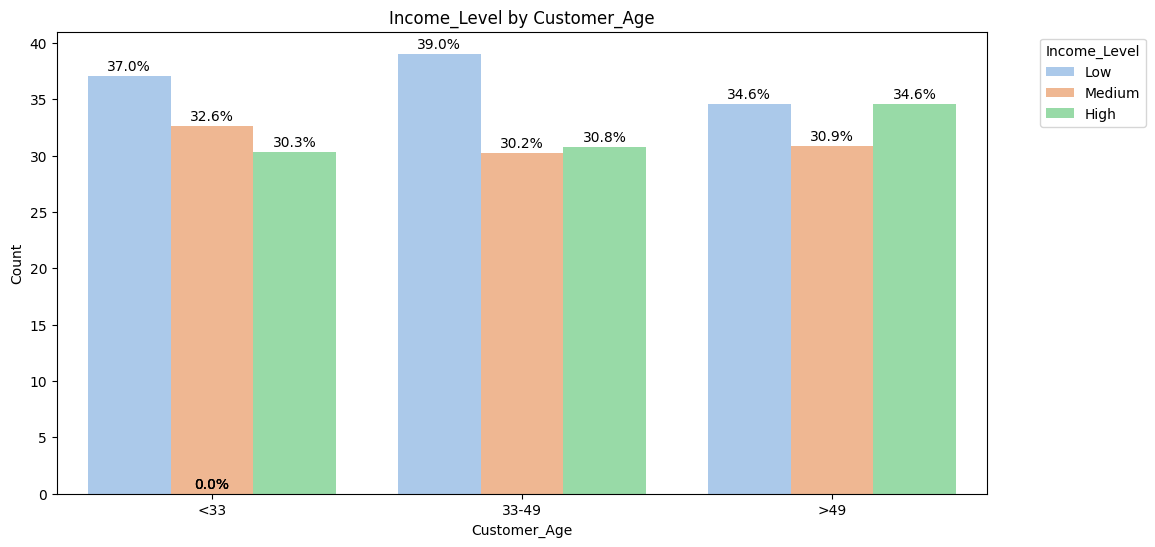

In [60]:
plt.figure(figsize=(12, 6))
income_order = ['Low', 'Medium', 'High']

# Group by 'Income_Level' and 'Customer_Age_binned' and count occurrences
income_age_counts = df_test.groupby(['Income_Level', 'Customer_Age_binned'], observed=False).size().reset_index(name='Count')

# Calculate the total count for each 'Customer_Age_binned'
total_counts = income_age_counts.groupby('Customer_Age_binned')['Count'].transform('sum')

# Calculate the percentage
income_age_counts['Percentage'] = (income_age_counts['Count'] / total_counts) * 100

# Plot the grouped data as a bar plot with 'Income_Level' as hue
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Customer_Age_binned', y='Percentage', hue='Income_Level', data=income_age_counts, palette='pastel', hue_order=income_order)

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center')

plt.title('Income_Level by Customer_Age')
plt.xlabel('Customer_Age')
plt.ylabel('Count')
plt.legend(title='Income_Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [61]:
# Calculate the total count of each 'Customer_Age_binned' for percentage calculation
total_counts = income_age_counts.groupby('Customer_Age_binned').sum()

total_counts

/var/folders/ss/2rd8cvtn1mjfqfkj8dfsp6fc0000gn/T/ipykernel_20472/2592695688.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = income_age_counts.groupby('Customer_Age_binned').sum()


Income_Level  Count  Percentage
Customer_Age_binned                                  
<33                  HighLowMedium    702       100.0
33-49                HighLowMedium    679       100.0
>49                  HighLowMedium    619       100.0

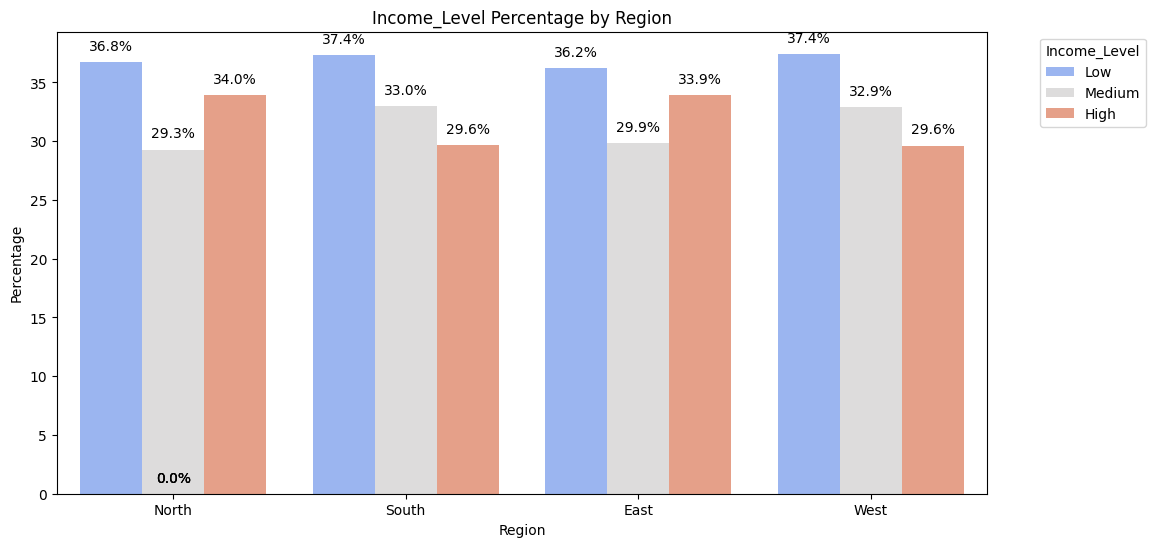

In [64]:
# Define the order of income levels
income_order = ['Low', 'Medium', 'High']

# Define the order of regions
region_order = ['North', 'South', 'East', 'West']

plt.figure(figsize=(12, 6))

# Group by 'Income_Level' and 'Region' and count occurrences
income_region_counts = df_test.groupby(['Region', 'Income_Level']).size().reset_index(name='Count')

# Calculate the total count for each 'Region'
total_counts = income_region_counts.groupby('Region')['Count'].transform('sum')

# Calculate the percentage
income_region_counts['Percentage'] = (income_region_counts['Count'] / total_counts) * 100

# Plot the grouped data as a bar plot with 'Region' on the x-axis and 'Income_Level' as hue
ax = sns.barplot(x='Region', y='Percentage', hue='Income_Level', data=income_region_counts, palette='coolwarm', hue_order=income_order, order=region_order)

# Add percentage labels on top of the bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    width = p.get_width()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center')

plt.title('Income_Level Percentage by Region')
plt.ylabel('Percentage')
plt.xlabel('Region')
plt.legend(title='Income_Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

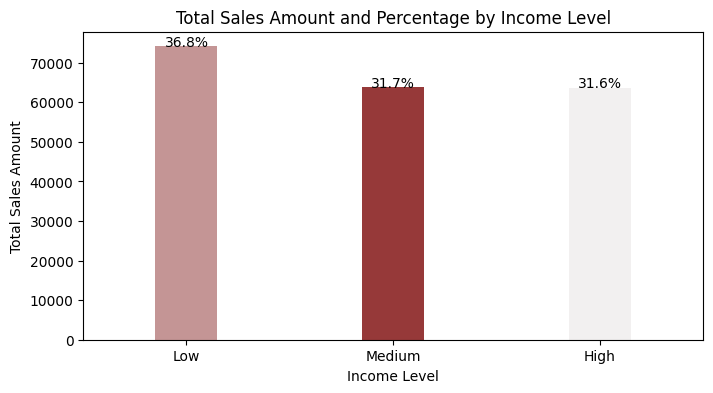

In [150]:
# Define the order of income levels
income_order = ['Low', 'Medium', 'High']

# Group by 'Income_Level' and calculate total sales amount for each group
income_sales = df_test.groupby('Income_Level')['Sales_Amount'].sum().reset_index()

# Calculate the total sales amount
total_sales = income_sales['Sales_Amount'].sum()

# Calculate the percentage of total sales for each income level
income_sales['Percentage'] = (income_sales['Sales_Amount'] / total_sales) * 100

# Plot the grouped data with reduced bar width
plt.figure(figsize=(8, 4))

# Plot the total sales amount
ax = sns.barplot(x='Income_Level', y='Sales_Amount', hue='Income_Level', data=income_sales, order=income_order, palette='light:brown', label='Total Sales Amount', width=0.3)

# Add percentage labels on top of the bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    width = p.get_width()
    ax.text(p.get_x() + width / 2, height + 10, f'{income_sales["Percentage"].iloc[i]:.1f}%', ha='center', fontsize=10, color='black')

plt.title('Total Sales Amount and Percentage by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Total Sales Amount')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- ### Product Analysis

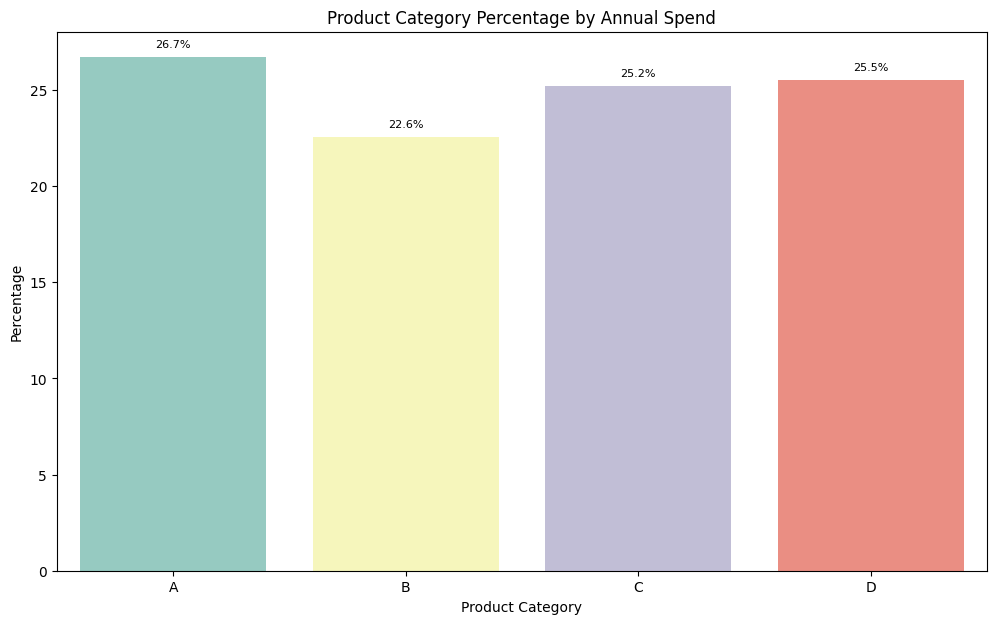

In [77]:
# Group by 'Product_Category' and calculate the sum of 'Annual_Spend' for each category
grouped_data_3 = df_test.groupby('Product_Category')['Annual_Spend'].sum().reset_index(name='Sum')

# Calculate the total sum of 'Annual_Spend'
total_sum = grouped_data_3['Sum'].sum()

# Calculate the percentage of total sum for each product category
grouped_data_3['Percentage'] = (grouped_data_3['Sum'] / total_sum) * 100

# Bar plot to show the percentage of the sum for each product category
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Product_Category', y='Percentage',hue='Product_Category', data=grouped_data_3, palette='Set3')

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', fontsize=8)

plt.title('Product Category Percentage by Annual Spend')
plt.xlabel('Product Category')
plt.ylabel('Percentage')
plt.show()


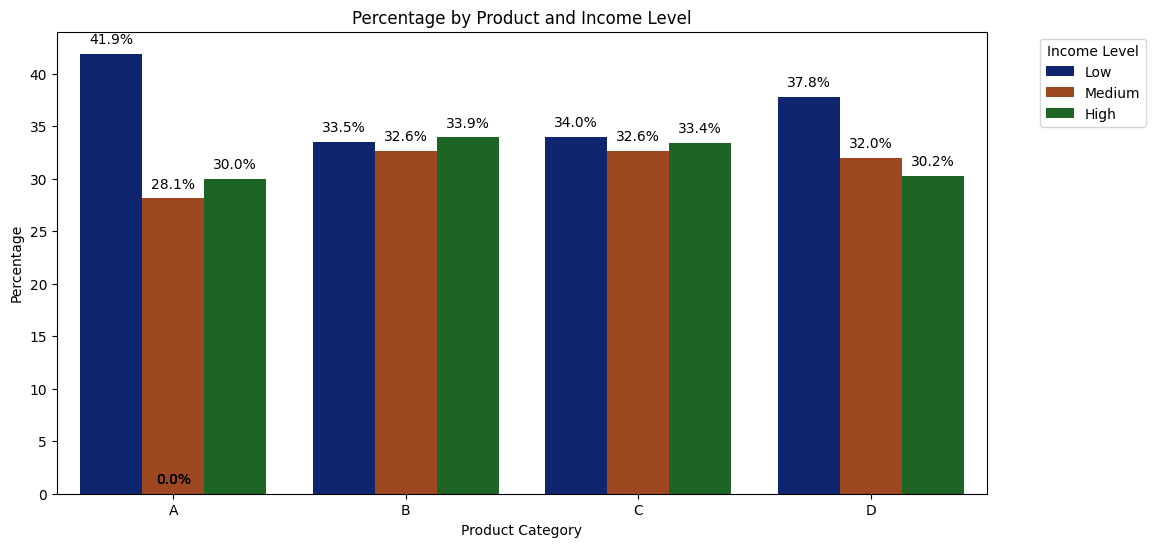

In [66]:
# Define the order of income levels
income_order = ['Low', 'Medium', 'High']

# Group by 'Product_Category' and 'Income_Level' and calculate the count for each category and income level
grouped_data = df_test.groupby(['Product_Category', 'Income_Level']).size().reset_index(name='Count')

# Calculate the total count for each 'Product_Category'
total_counts = grouped_data.groupby('Product_Category')['Count'].transform('sum')

# Calculate the percentage for each column
grouped_data['Percentage'] = (grouped_data['Count'] / total_counts) * 100

# Bar plot to show the percentage for each product category and income level
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Product_Category', y='Percentage', hue='Income_Level', data=grouped_data,
                 palette='dark', order=['A', 'B', 'C', 'D'], hue_order=income_order)

# Add percentage labels on top of the bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%', ha='center')

plt.title('Percentage by Product and Income Level')
plt.xlabel('Product Category')
plt.ylabel('Percentage')
plt.legend(title='Income Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


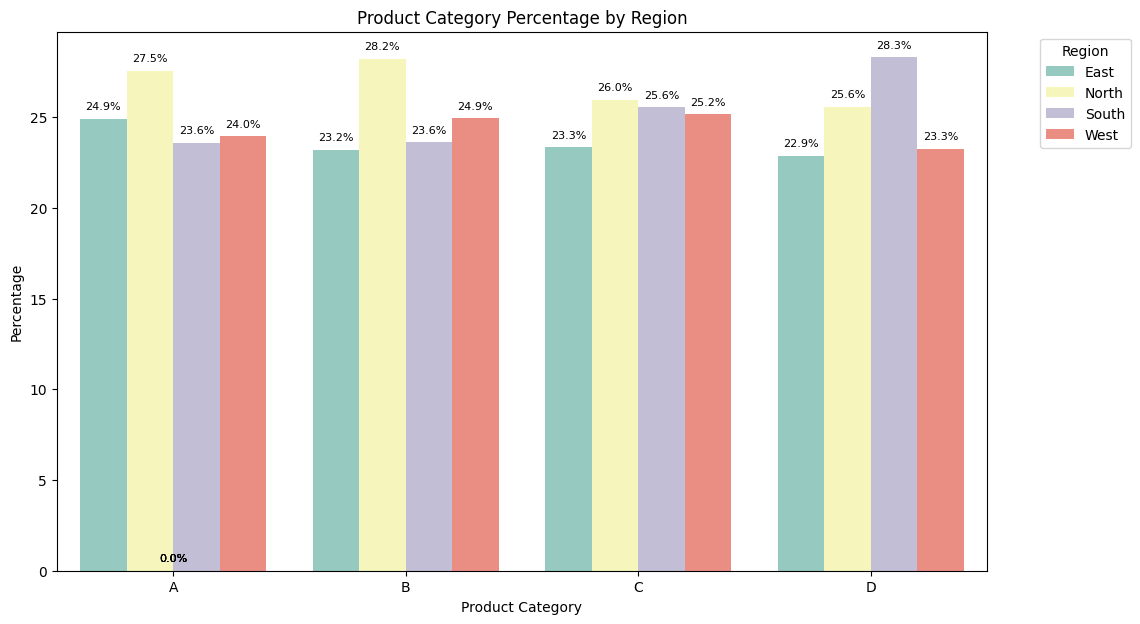

In [68]:
# Group by 'Product_Category' and 'Region' and count occurrences
grouped_data = df_test.groupby(['Product_Category', 'Region']).size().reset_index(name='Count')

# Calculate the total count for each region
total_counts = grouped_data.groupby('Product_Category')['Count'].transform('sum')

# Calculate the percentage of total counts for each product category
grouped_data['Percentage'] = (grouped_data['Count'] / total_counts) * 100

# Bar plot to show the percentage of counts for each product category per region
plt.figure(figsize=(12, 7))

# Plot the data with reduced bar width
ax = sns.barplot(x='Product_Category', y='Percentage', hue='Region', data=grouped_data, palette='Set3')

# Add percentage labels on top of the bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', fontsize=8)

plt.title('Product Category Percentage by Region')
plt.xlabel('Product Category')
plt.ylabel('Percentage')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- ### Discount Usage and Age

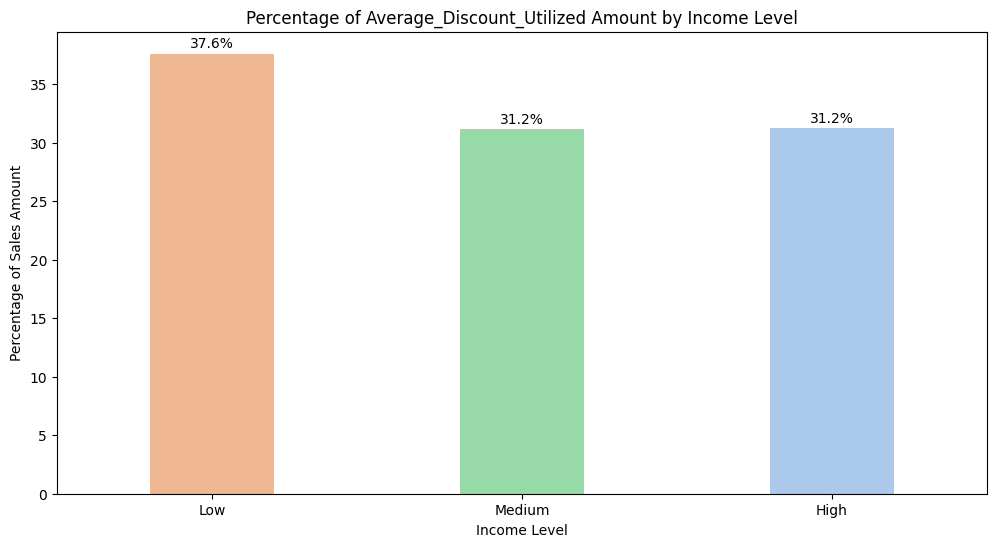

In [72]:
# Group by 'Income_Level' and calculate the total sales amount for each income level
income_sales = df_test.groupby('Income_Level')['Average_Discount_Utilized'].sum().reset_index()

# Calculate the total sales amount
total_sales = income_sales['Average_Discount_Utilized'].sum()

# Calculate the percentage of total sales for each income level
income_sales['Percentage'] = (income_sales['Average_Discount_Utilized'] / total_sales) * 100

# Define the order of income levels
income_order = ['Low', 'Medium', 'High']

# Plot the data using a bar plot with hue='Income_Level'
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Income_Level', y='Percentage', hue='Income_Level', data=income_sales, order=income_order, palette='pastel', dodge=False, width = 0.4)

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center')

plt.title('Percentage of Average_Discount_Utilized Amount by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Percentage of Sales Amount')
plt.show()

/var/folders/ss/2rd8cvtn1mjfqfkj8dfsp6fc0000gn/T/ipykernel_20472/1757165728.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df_test.groupby('Customer_Age_binned')['Average_Discount_Utilized'].sum().reset_index()


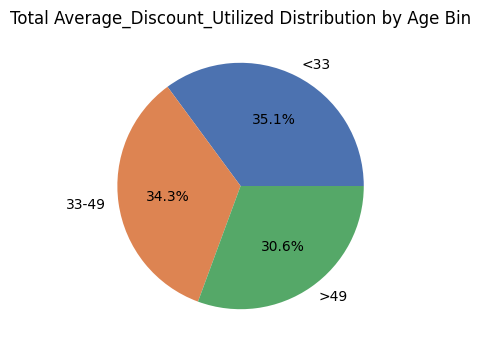

In [73]:
# Group by 'Customer_Age_binned' and calculate the total sales amount for each age bin
age_sales = df_test.groupby('Customer_Age_binned')['Average_Discount_Utilized'].sum().reset_index()

# Plot total sales amount for each age bin using a pie chart
plt.figure(figsize=(4, 4))
plt.pie(age_sales['Average_Discount_Utilized'], labels=age_sales['Customer_Age_binned'], autopct='%1.1f%%', colors=sns.color_palette('deep'))
plt.title('Total Average_Discount_Utilized Distribution by Age Bin')
plt.show()

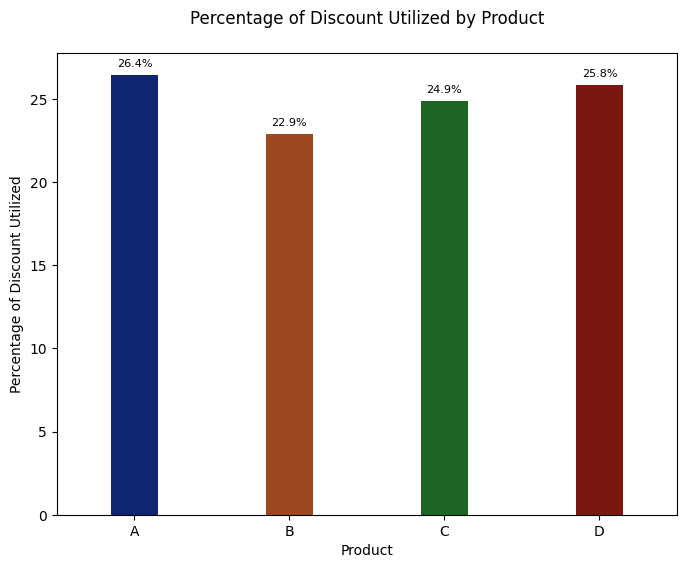

In [67]:
# Group by 'Product_Category' and calculate the sum of discounts for each category
grouped_data = df_test.groupby('Product_Category')['Average_Discount_Utilized'].sum().reset_index(name='Total_Discount')

# Calculate the total discount amount
total_discount = grouped_data['Total_Discount'].sum()

# Calculate the percentage of total discount for each product category
grouped_data['Percentage'] = (grouped_data['Total_Discount'] / total_discount) * 100

# Bar plot to show percentage of discount used for each product category
plt.figure(figsize=(8, 6))

# Plot the data with reduced bar width
ax = sns.barplot(x='Product_Category', y='Percentage', hue='Product_Category', data=grouped_data, palette='dark', width=0.3)

# Add percentage labels on top of the bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', fontsize=8)

plt.title('Percentage of Discount Utilized by Product\n')
plt.xlabel('Product')
plt.ylabel('Percentage of Discount Utilized')
plt.show()


- ### Subscription and Region

In [78]:
df.columns

Index(['Sales_Amount', 'Customer_Age', 'Transaction_Count', 'Product_Category',
       'Region', 'Repeat_Customer', 'Income_Level', 'Customer_Lifetime_Value',
       'Annual_Spend', 'Average_Discount_Utilized', 'Session_Duration_Minutes',
       'Page_Views_per_Session', 'Ad_Clicks_per_Session',
       'Products_Viewed_per_Session', 'Subscription_Status'],
      dtype='object')

In [79]:

df_subs = df_test[['Subscription_Status','Annual_Spend']]
df_grp_subs = df_subs.groupby(['Subscription_Status'],as_index=False).mean()

df_grp_subs


Subscription_Status  Annual_Spend
0      Not_Subscribed   2695.491287
1          Subscribed   2721.840707

In [80]:
df_pivot_subs = df_grp_subs.pivot_table(index='Subscription_Status', values='Annual_Spend', aggfunc='mean')

df_pivot_subs


Annual_Spend
Subscription_Status              
Not_Subscribed        2695.491287
Subscribed            2721.840707

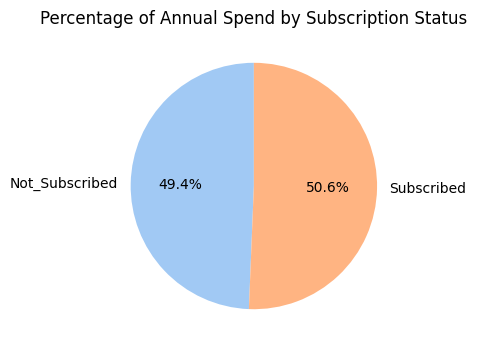

In [81]:
# Group by 'Subscription_Status' and calculate the total annual spend for each group
grouped_data = df_test.groupby('Subscription_Status')['Annual_Spend'].sum().reset_index()

# Calculate the total annual spend
total_annual_spend = grouped_data['Annual_Spend'].sum()

# Calculate the percentage of total annual spend for each subscription status
grouped_data['Percentage'] = (grouped_data['Annual_Spend'] / total_annual_spend) * 100

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(grouped_data['Percentage'], labels=grouped_data['Subscription_Status'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Percentage of Annual Spend by Subscription Status')
plt.show()

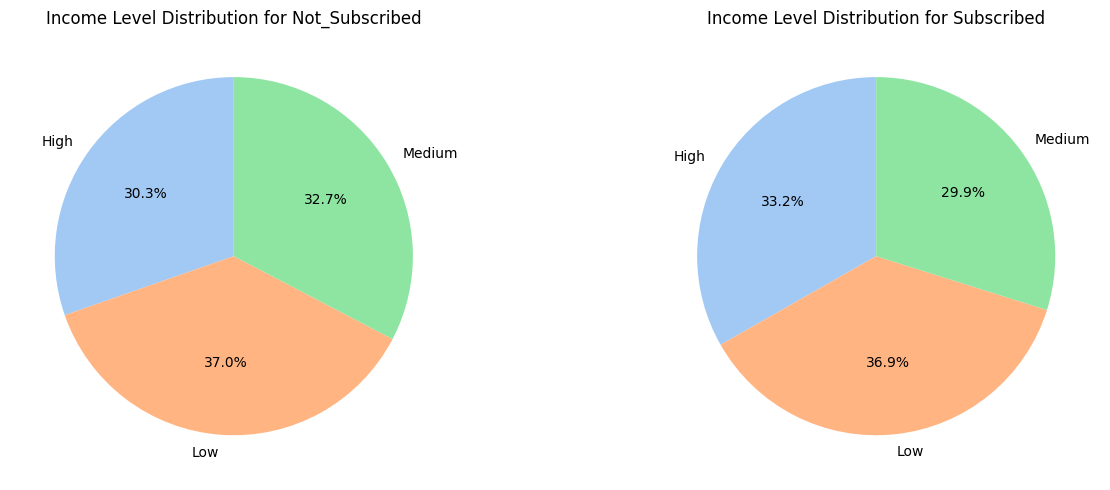

In [82]:
# Create subplots for each row (Subscription_Status)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Group by 'Subscription_Status' and 'Income_Level' and count occurrences
grouped_subscribed_income = df_test.groupby(['Subscription_Status', 'Income_Level']).size().reset_index(name='Count')

# Create a pivot table for better visualization
pivot_grouped_subscribed_income = grouped_subscribed_income.pivot(index='Subscription_Status', columns='Income_Level', values='Count').fillna(0)

# Normalize the counts to get percentages
pivot_grouped_subscribed_income_percentage = pivot_grouped_subscribed_income.div(pivot_grouped_subscribed_income.sum(axis=1), axis=0) * 100

# Loop through each row and create a pie chart
for i, (index, row) in enumerate(pivot_grouped_subscribed_income_percentage.iterrows()):
    ax = axes[i]
    ax.pie(row, labels=row.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax.set_title(f'Income Level Distribution for {index}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


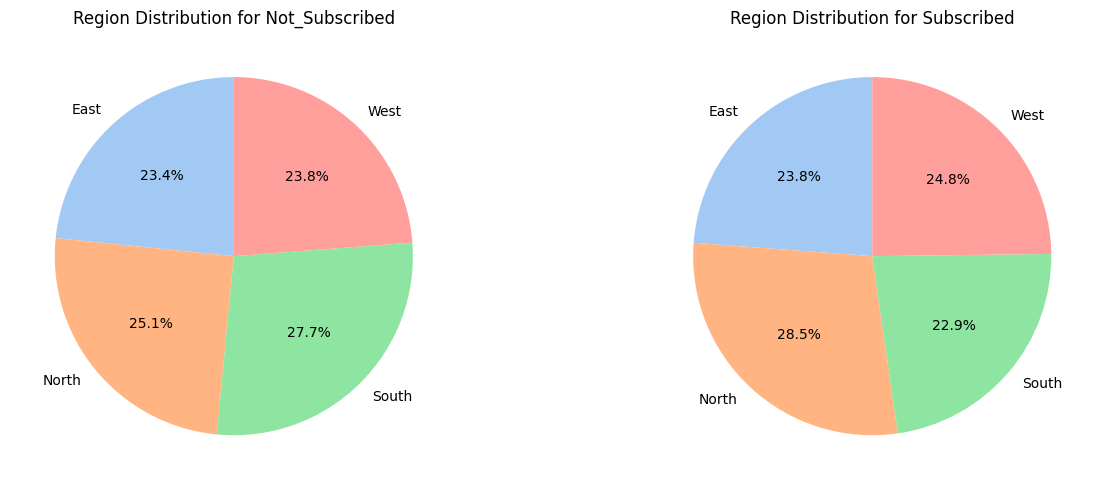

In [83]:
# Create subplots for each row (Region)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Group by 'Subscription_Status' and 'Region' and count occurrences
grouped_subscribed_region = df_test.groupby(['Subscription_Status', 'Region']).size().reset_index(name='Count')

# Create a pivot table for better visualization
pivot_grouped_subscribed_region = grouped_subscribed_region.pivot(index='Subscription_Status', columns='Region', values='Count').fillna(0)

# Normalize the counts to get percentages
pivot_grouped_subscribed_region_percentage = pivot_grouped_subscribed_region.div(pivot_grouped_subscribed_region.sum(axis=1), axis=0) * 100

# Loop through each row and create a pie chart
for i, (index, row) in enumerate(pivot_grouped_subscribed_region_percentage.iterrows()):
    ax = axes[i]
    ax.pie(row, labels=row.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax.set_title(f'Region Distribution for {index}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## Customer Engagement Analysis

- ### Ad Clicks and Sales- ### 

In [84]:
df_test[['Page_Views_per_Session','Ad_Clicks_per_Session','Products_Viewed_per_Session']].describe(include='all')


Page_Views_per_Session  Ad_Clicks_per_Session  \
count             2000.000000            2000.000000   
mean                 5.066500               2.048500   
std                  2.324173               1.437422   
min                  0.000000               0.000000   
25%                  3.000000               1.000000   
50%                  5.000000               2.000000   
75%                  7.000000               3.000000   
max                 15.000000               9.000000   

       Products_Viewed_per_Session  
count                  2000.000000  
mean                      3.943500  
std                       1.940925  
min                       0.000000  
25%                       3.000000  
50%                       4.000000  
75%                       5.000000  
max                      13.000000

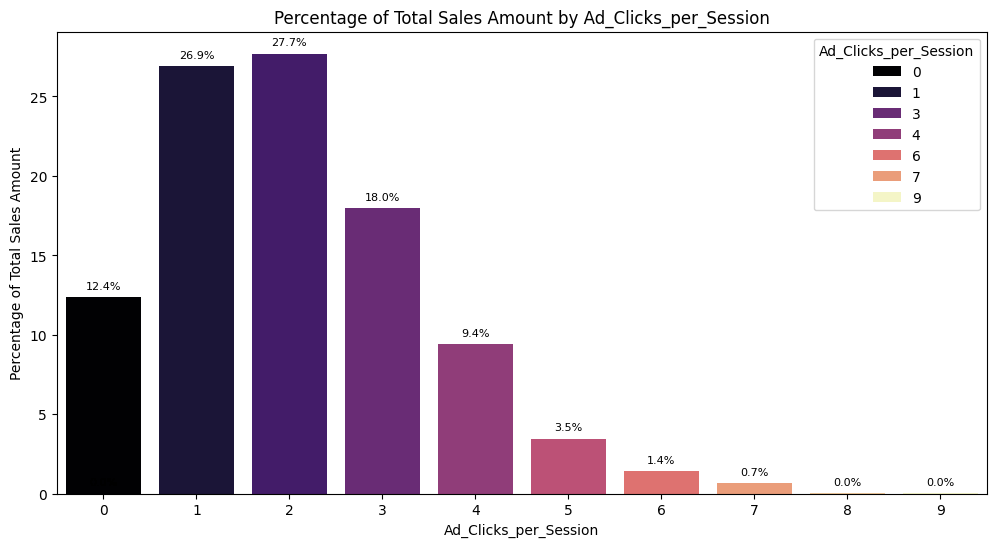

In [85]:
# Group by 'Ad_Clicks_per_Session' and calculate total sales amount for each group
sales_ad_clicks = df_test.groupby('Ad_Clicks_per_Session')['Sales_Amount'].sum().reset_index()

# Calculate the total sales amount
total_sales = sales_ad_clicks['Sales_Amount'].sum()

# Calculate the percentage of total sales for each 'Ad_Clicks_per_Session'
sales_ad_clicks['Percentage'] = (sales_ad_clicks['Sales_Amount'] / total_sales) * 100

# Plot the grouped data with percentage on the y-axis
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Ad_Clicks_per_Session', y='Percentage', hue='Ad_Clicks_per_Session', data=sales_ad_clicks, palette='magma')

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', fontsize=8)

plt.title('Percentage of Total Sales Amount by Ad_Clicks_per_Session')
plt.xlabel('Ad_Clicks_per_Session')
plt.ylabel('Percentage of Total Sales Amount')
plt.show()

- ### Product Viewed and Sales

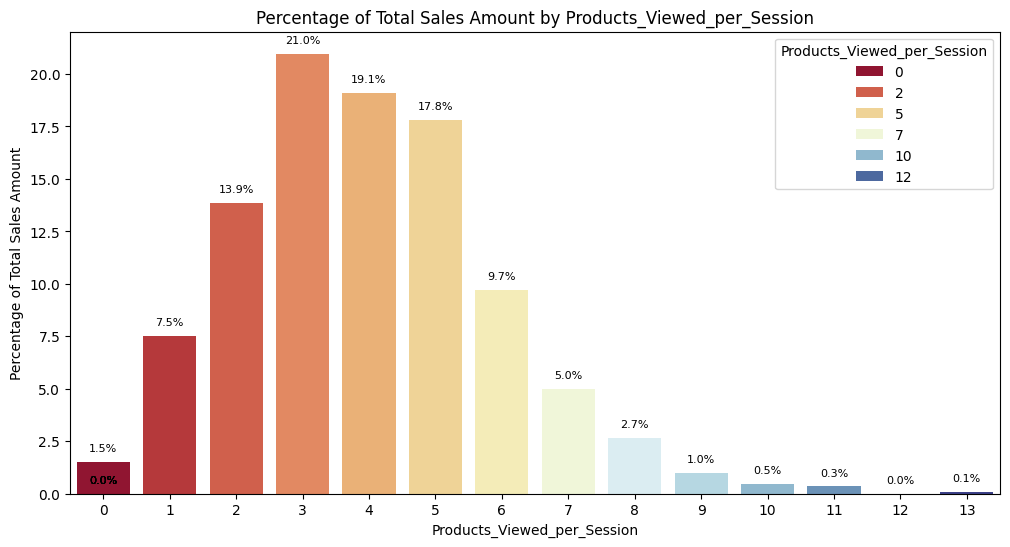

In [86]:
# Group by 'Products_Viewed_per_Session' and calculate total sales amount for each group
sales_prod_viewed = df.groupby('Products_Viewed_per_Session')['Sales_Amount'].sum().reset_index()

# Calculate the total sales amount
total_sales = sales_prod_viewed['Sales_Amount'].sum()

# Calculate the percentage of total sales for each 'Products_Viewed_per_Session'
sales_prod_viewed['Percentage'] = (sales_prod_viewed['Sales_Amount'] / total_sales) * 100

# Plot the grouped data with percentage on the y-axis
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Products_Viewed_per_Session', y='Percentage', hue='Products_Viewed_per_Session', data=sales_prod_viewed, palette='RdYlBu')

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', fontsize=8)

plt.title('Percentage of Total Sales Amount by Products_Viewed_per_Session')
plt.xlabel('Products_Viewed_per_Session')
plt.ylabel('Percentage of Total Sales Amount')
plt.show()


**Customer Preferences**: 

Analyze preferences based on 'Product_Category' and 'Region'

In [99]:
df_region_income_product = df_test[['Product_Category', 'Region', 'Income_Level']]

# Group by 'Product_Category', 'Region', and 'Income_Level' and count occurrences
df_grp_2 = df_region_income_product.groupby(['Product_Category', 'Region', 'Income_Level']).size().reset_index(name='Count')

# Rename the column
df_grp_2 = df_grp_2.rename(columns={'size': 'Count'})

df_grp_2

Product_Category Region Income_Level  Count
0                 A   East         High     42
1                 A   East          Low     48
2                 A   East       Medium     42
3                 A  North         High     47
4                 A  North          Low     63
5                 A  North       Medium     36
6                 A  South         High     33
7                 A  South          Low     58
8                 A  South       Medium     34
9                 A   West         High     37
10                A   West          Low     53
11                A   West       Medium     37
12                B   East         High     43
13                B   East          Low     33
14                B   East       Medium     30
15                B  North         High     42
16                B  North          Low     47
17                B  North       Medium     40
18                B  South         High     32
19                B  South          Low     37
20                B  South       Medium     39
21                B   West         High     38
22                B   West          Low     36
23                B   West       Medium     40
24                C   East         High     36
25                C   East          Low     43
26                C   East       Medium     37
27                C  North         High     50
28                C  North          Low     42
29                C  North       Medium     37
30                C  South         High     42
31                C  South          Low     42
32                C  South       Medium     43
33                C   West         High     38
34                C   West          Low     42
35                C   West       Medium     45
36                D   East         High     39
37                D   East          Low     47
38                D   East       Medium     32
39                D  North         High     43
40                D  North          Low     45
41                D  North       Medium     44
42                D  South         High     43
43                D  South          Low     52
44                D  South       Medium     51
45                D   West         High     31
46                D   West          Low     51
47                D   West       Medium     38

In [100]:
df_pivot_2 = df_grp_2.pivot(index = ['Product_Category', 'Region'], columns='Income_Level')

df_pivot_2


Count           
Income_Level             High Low Medium
Product_Category Region                 
A                East      42  48     42
                 North     47  63     36
                 South     33  58     34
                 West      37  53     37
B                East      43  33     30
                 North     42  47     40
                 South     32  37     39
                 West      38  36     40
C                East      36  43     37
                 North     50  42     37
                 South     42  42     43
                 West      38  42     45
D                East      39  47     32
                 North     43  45     44
                 South     43  52     51
                 West      31  51     38

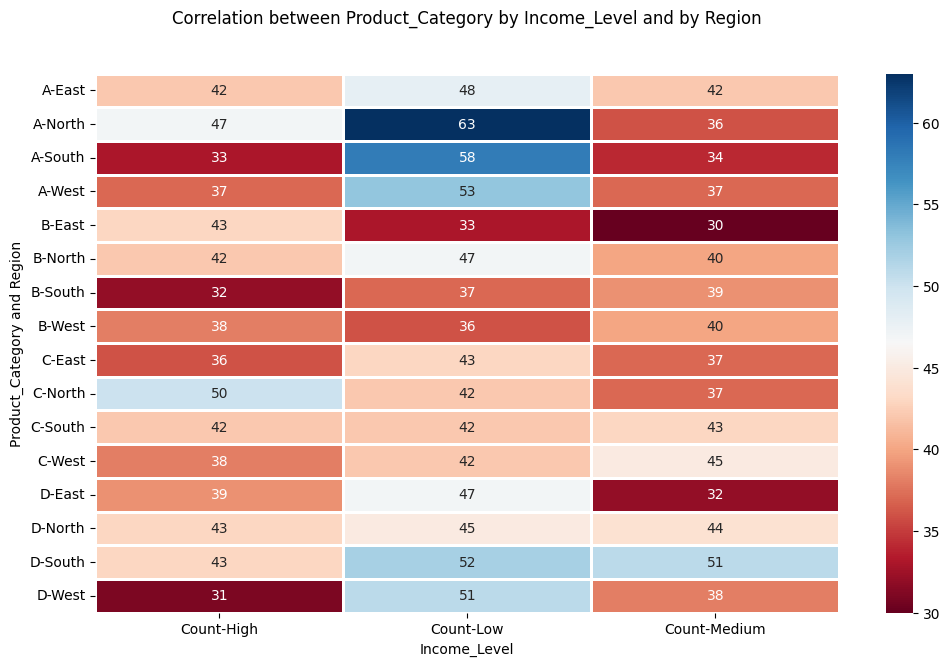

In [101]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_pivot_2, cmap='RdBu', annot=True, fmt='d', linewidths=1.0, cbar=True)
plt.title('Correlation between Product_Category by Income_Level and by Region\n\n')
plt.xlabel('Income_Level')
plt.ylabel('Product_Category and Region')
plt.show()


